### install

In [21]:
# pip install -U imbalanced-learn

In [22]:
# pip install -U imbalanced-learn

In [23]:
# pip install wfdb

In [24]:
# pip install sklearn

In [25]:
# pip install lightgbm

In [26]:
# pip install xgboost

In [27]:
# pip install xgboost cudatoolkit=10.1 #xgboost의 gpu모델 사용관련 코드

In [28]:
# pip install imblearn

### import

In [29]:
input_sex_age_col=input("Are you using the [age] and [sex] columns? Y/N")

In [30]:
import ast
import wfdb
import h5py

from glob import glob
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.decomposition import PCA         
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve, auc

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification

from xgboost.sklearn import XGBClassifier
# import lightgbm as lgb  

### 데이터 읽기
- input 요소 있음. 콜렙은 c, 데스크탑은 D, 서버에서는 s 라고 치면됨. 대문자 소문자 상관없음.

In [31]:
res = os.getcwd()
base_path = os.path.join(res)
base_path_ptb = os.path.join(res, 'ptb_xl_data') + '/'
base_path_shp = os.path.join(res, 'sph_data') + '/'

### colab사용유무 

In [32]:
# while True:
#     data_location = input("Are you using the colab? Y/N" )

#     if data_location.lower() == 'y':
#         # Google Colab
#         from google.colab import drive
#         drive.mount('/content/drive')
#         base_path = '/content/drive/MyDrive/ds8/harbud/ecg' + '/'
#         base_path_ptb = '/content/drive/MyDrive/ds8/harbud/ecg/ptb_xl_data' + '/'
#         base_path_shp = '/content/drive/MyDrive/ds8/harbud/ecg/sph_data' + '/'
#         break
#     elif data_location.lower() == 'n':
#         res = os.getcwd()
#         base_path = os.path.join(res)
#         base_path_ptb = os.path.join(res, 'ptb_xl_data') + '/'
#         base_path_shp = os.path.join(res, 'sph_data') + '/'
#         break
#     else:
#         print('입력값이 올바르지 않습니다. 다시 입력하세요.')


In [33]:
df_ptb_origin = pd.read_csv(base_path_ptb + 'ptbxl_database.csv', encoding='utf-8',index_col='ecg_id')
df_sph_origin = pd.read_csv(base_path_shp + 'metadata.csv', encoding='utf-8', index_col='ECG_ID')

### Ptb_xl의 심박수 데이터 lead1 추출 -> .csv 파일로만듬
 - 신호 및 의료 데이터에 대한 읽기 및 쓰기 기능을 제공하는 wfdb를 이용해서 데이터를 읽음.
 - 각 데이터는 PTBXL_DATABASE에 컬럼으로 만들어 져 있음. 100HZ와 500HZ중 500HZ사용. (테스트 데이터와 맞추기위해)
 - df_lead1.to_csv 로 저장해서 사용하기 편하게 만들어둠

In [34]:
# #신호 데이터 읽기
# filenames = df_ptb_origin.filename_hr.tolist()    #filename_lr은 100Hz로 저장되어 있는 신호 데이터 파일 경로이고, filename_hr은 500Hz, 여기서는 500Hz만 사용

# df_lead1= pd.DataFrame()

# for ptb_index in tqdm(range(len(df_ptb_origin.index)), 'time'):
#     signal, meta = wfdb.rdsamp(base_path_ptb + filenames[ptb_index])
#     lead1 = signal[:, 0]
#     df_lead1 = pd.concat([df_lead1, pd.DataFrame(lead1).T], axis=0)
# df_lead1.index = df_ptb_origin.index[:]

# df_lead1.to_csv(base_path + r'\custom_file\ashton_ptb_lead1.csv', encoding='UTF-8')


### shp의 심박수 데이터 lead1 추출 -> .csv 파일로만듬

In [35]:
# filenames = sorted(glob(base_path + r"sph_data\records_sph\*.h5"))

# df_sph_origin['filename'] = filenames

# df_lead1_sph = pd.DataFrame()

# for shp_index in tqdm(range(len(df_sph_origin.index)), 'time'):
# # for shp_index in tqdm(range(0, 3), desc='time'):
#     filename = df_sph_origin.filename.tolist()[shp_index]

#     with h5py.File(filename, 'r') as f:
#         signal = f['ecg'][:]
#     lead1 = signal[0, :]

#     if lead1.shape[0] == 5000:
#         lead1_df = pd.DataFrame(lead1)
#     # 데이터의 길이가 5000보다 큰 경우, 연속적인 5000개의 데이터를 랜덤하게 선택
#     else:
#         start_idx = np.random.randint(0, lead1.shape[0] - 4999)  # 마지막 5000개를 포함할 수 있도록 인덱스 설정
#         lead1_df = pd.DataFrame(lead1[start_idx:start_idx+5000])

#     df_lead1_sph = pd.concat([df_lead1_sph, pd.DataFrame(lead1_df).T], axis=0, ignore_index=True)

# df_lead1_sph.index = df_sph_origin.index

# df_lead1_sph.to_csv(base_path + r'\custom_file\ashton_sph_lead1.csv', encoding='UTF-8')


[with문 설명]

with 문은 파일이나 네트워크 연결과 같은 리소스를 사용하는 동안에는 해당 리소스를 안전하게 사용하기 위한 구문입니다. 

with 문을 사용하면 파일이나 네트워크 연결을 열고 사용한 후 자동으로 닫아주는 코드를 작성할 필요가 없습니다.

- h5py.File(filename, 'r')는 HDF5 파일을 '읽기 전용' 모드로 엽니다.
- with 문을 사용하면 블록 안에서 파일을 사용한 후 블록을 벗어나면 파일이 자동으로 닫힙니다. 따라서 파일을 명시적으로 닫아줄 필요가 없습니다.
signal = f['ecg'][:].T는 HDF5 파일에서 'ecg'라는 데이터셋을 가져와서 해당 데이터를 NumPy 배열로 읽어옵니다. 마지막으로 .T는 전치(transpose)를 수행하여 배열의 행과 열을 바꿉니다.
- with 문은 예외 발생 시에도 안전하게 리소스를 정리하는 데 도움을 줍니다. 파일이나 네트워크 연결과 같은 리소스를 사용한 후에는 명시적으로 닫아주는 것이 좋은 프로그래밍 습관이지만, with 문을 사용하면 이를 누락하는 실수를 방지할 수 있습니다.

### 위를 통해서 만들어진 .csv 파일 읽기

In [36]:
df_ptb_lead1 = pd.read_csv(base_path + '/custom_file/ashton_ptb_lead1.csv', index_col=0)

df_sph_lead1 = pd.read_csv(base_path + '/custom_file/ashton_sph_lead1.csv', index_col=0)

### PTB_xl, SHP 데이터 라벨링

In [37]:
#PTB 라벨링

#scp_codes 에서 AFIB에 해당하는 것에 대해서 라벨링
df_ptb_origin.scp_codes = df_ptb_origin.scp_codes.apply(lambda x: ast.literal_eval(x))
df_ptb_origin.scp_codes = df_ptb_origin.scp_codes.apply(lambda x: list(x.keys()))
df_ptb_origin['label'] = df_ptb_origin.scp_codes.apply(lambda arr: 1 if 'AFIB' in arr else 0)

print('df_ptb_origin : ',df_ptb_origin.label.value_counts())
print('-'*15)

#SHP 라벨링

# df_sph_origin['label'] = df_sph_origin['AHA_Code'].apply(lambda x: 1 if '50' in str(x) else 0) - 기존에 잘못된
# 'AHA_Code' 컬럼의 각 값에 대해 '50'이 포함되어 있는지 확인하고, 'label' 컬럼 생성
def check_contains_50(code):
    # 공백을 없애고, ';' 또는 '+'로 분리
    numbers = code.replace(' ', '').replace('+', ';').split(';')
    # '50'이 포함되어 있는지 확인
    return '50' in numbers
# 'label' 컬럼 생성
df_sph_origin['label'] = df_sph_origin['AHA_Code'].apply(check_contains_50).astype(int)


print('df_sph_origin : ',df_sph_origin.label.value_counts())

df_ptb_origin :  label
0    20285
1     1514
Name: count, dtype: int64
---------------
df_sph_origin :  label
0    25095
1      675
Name: count, dtype: int64


### age, sex, label 컬럼과 심박수 데이터 합치기

In [38]:
df_ptb = pd.concat([df_ptb_origin[['age', 'sex', 'label']], df_ptb_lead1], axis=1)

df_sph_lead1.index = df_sph_origin.index
df_sph = pd.concat([df_sph_origin[['Age', 'Sex', 'label']], df_sph_lead1], axis=1)


### 'age', 'sex' 사용 여부에 따른 train, val, test 
- input 요소 있음.
  - 심박수 데이터만 사용할려면 : N
  - age, sex데이터를 함께 사용하려면 : Y
  
(답변시 대문자 소문자 상관없음)

In [39]:
    # age_sex_col=input("Are you using the [age] and [sex] columns? Y/N" )

In [40]:
while True:
    age_sex_col=input_sex_age_col

    if age_sex_col.lower() == 'y':

        X = df_ptb.drop(['label'], axis=1)
        y = df_ptb['label']
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

        X_sph_test = df_sph.drop(['label'], axis=1)
        y_sph_test = df_sph['label']
        break

    elif age_sex_col.lower() == 'n':

        X = df_ptb.drop(['age', 'sex', 'label'], axis=1)
        y = df_ptb['label']
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

        X_sph_test = df_sph.drop(['Age', 'Sex', 'label'], axis=1)
        y_sph_test = df_sph['label']
        break
    else:
        print('입력값이 올바르지 않습니다. 다시 입력하세요.')


In [41]:

# # X_train, y_train은 훈련 데이터의 특징과 레이블을 나타냅니다.
# # 예를 들어, X_train은 (샘플 수, 특징 수)의 2D 배열이어야 합니다.
# # y_train은 이진 분류의 경우 0 또는 1 값을 가지는 1D 배열이어야 합니다.

# # 언더샘플링을 위한 객체 생성
# rus = RandomUnderSampler(random_state=42)
# print("클래스 분포 (언더샘플링 전):", Counter(X_train))
# print("클래스 분포 (언더샘플링 전):", Counter(y_train))
# # 언더샘플링 적용
# X_train, y_train = rus.fit_resample(X_train, y_train)
# # X_val, y_val = rus.fit_resample(X_val, y_val)
# # X_test, y_test = rus.fit_resample(X_test, y_test)
# # X_sph_test, y_sph_test = rus.fit_resample(X_sph_test, y_sph_test)

# # 언더샘플링 전과 후의 클래스 분포 확인
# print("클래스 분포 (언더샘플링 후):", Counter(X_train))
# print("클래스 분포 (언더샘플링 후):", Counter(y_train))

In [42]:
# oversampler = RandomOverSampler(random_state=42)
# X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [43]:
scaler_std = StandardScaler()
X_train_scaler_std = scaler_std.fit_transform(X_train)
X_val_scaler_std = scaler_std.transform(X_val)
X_test_scaler_std = scaler_std.transform(X_test)
X_sph_test_scaler_std = scaler_std.transform(X_sph_test)


In [44]:
# pca = PCA(n_components=0.95, random_state=42)

# X_train = pca.fit_transform(X_train_scaler_std)

# X_val = pca.transform(X_val_scaler_std)
# X_test = pca.transform(X_test_scaler_std)
# X_sph_test = pca.transform(X_sph_test_scaler_std)


### 오리지널 데이터 전처리
 - sph의 성별데이터 F,M 

### 모델

In [45]:
# xgb = XGBClassifier(n_estimators=250,
#                     max_depth=15,
#                     colsample_bynode=0.75,
#                     # colsample_bytree=0.5,
#                     # colsample_bylevel=0.5,
#                     reg_lambda=1,
#                     learning_rate=1e-2,
#                     random_state=22,
#                     n_jobs=-1)

# model = xgb

최적의 하이퍼파라미터: {'colsample_bynode': 0.5, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'reg_lambda': 0.1}

In [46]:


# # GPU를 사용하기 위해 환경 변수 설정
# os.environ['CUDA_VISIBLE_DEVICES'] = '0'  # 사용할 GPU의 번호

# # XGBoost 분류기 초기화
# xgb = XGBClassifier(tree_method='gpu_hist', gpu_id=0)  # GPU 사용 설정

# # 튜닝할 하이퍼파라미터 설정
# param_grid = {
#     'n_estimators': [150, 200, 300],
#     'max_depth': [5, 10, 15],
#     'colsample_bynode': [0.1, 0.25, 0.5],
#     'reg_lambda': [0.01, 0.05, 0.1,0.5],
#     'learning_rate': [1e-2, 1e-3, 1e-4]
# }

# # 그리드 탐색 수행
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # 최적의 하이퍼파라미터 출력
# print("최적의 하이퍼파라미터:", grid_search.best_params_)

# # 테스트 세트에서 모델 평가
# best_model = grid_search.best_estimator_
# y_val_pred = best_model.predict(X_val)


In [47]:
# model=best_model

In [48]:
xgb = XGBClassifier(n_estimators=300,
                    max_depth=7,
                    colsample_bynode=0.75,
                    # colsample_bytree=0.5,
                    # colsample_bylevel=0.5,
                    reg_lambda=1,
                    learning_rate=1e-2,
                    random_state=42,
                    n_jobs=-1)

model = xgb

In [49]:
# 최적의 하이퍼파라미터: {'colsample_bynode': 0.5, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'reg_lambda': 0.1}

In [50]:
# 차원축소 끄고
#최적의 하이퍼파라미터: {'colsample_bynode': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'reg_lambda': 0.01}

In [51]:
# 언더 샘플링  
# 최적의 하이퍼파라미터: {'colsample_bynode': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'reg_lambda': 0.01}

In [52]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.75,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

r(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.75,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

### Ptb_xl의 Val 진행( 10% 데이터)

In [53]:
# 모델로 예측 수행
y_val_pred = model.predict(X_val)

In [54]:
cross_entropy = log_loss(y_val, y_val_pred, labels=[0, 1])
print(f'Cross-Entropy: {cross_entropy}')

Cross-Entropy: 2.5131354656632143


In [55]:


# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

# True Positive, False Positive, False Negative, True Negative
tp, fp, fn, tn = conf_matrix.ravel()

# Sensitivity (Recall)
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

# Precision
precision = precision_score(y_val, y_val_pred)
print(f"Precision: {precision}")

# F1 Score
f1 = f1_score(y_val, y_val_pred)
print(f"F1 Score: {f1}")

# AUROC
y_prob = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print(f"AUROC: {roc_auc}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

Confusion Matrix:
[[2028    0]
 [ 152    0]]
Sensitivity (Recall): 0.9302752293577982
Specificity: nan
Precision: 0.0
F1 Score: 0.0


/tmp/ipykernel_879712/3359117334.py:14: RuntimeWarning: invalid value encountered in scalar divide
  specificity = tn / (tn + fp)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUROC: 0.7332379580608326
Precision-Recall AUC: 0.15268394377743705


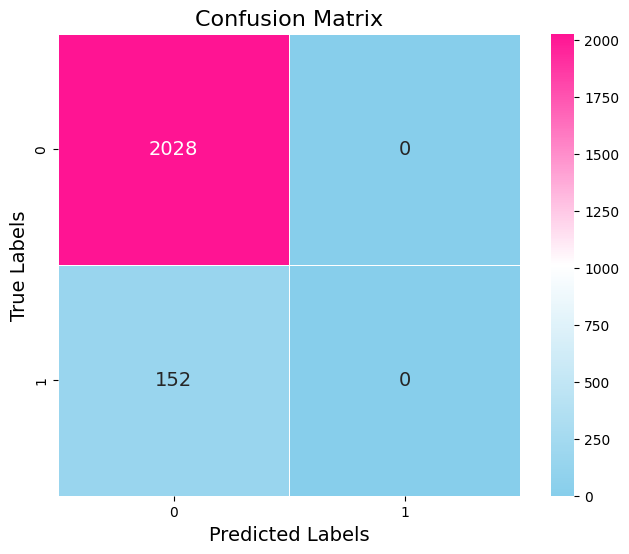

In [56]:
from matplotlib.colors import LinearSegmentedColormap

# 예측과 정답을 기반으로 Confusion Matrix 계산
conf_matrix = confusion_matrix(y_val, y_val_pred)

# 사용자 정의 그라데이션 컬러맵 생성
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['skyblue', 'white', '#FF1493'], N=256)

# Matplotlib을 사용하여 Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, cbar=True, 
            annot_kws={"size": 14}, linewidths=.5, square=True)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

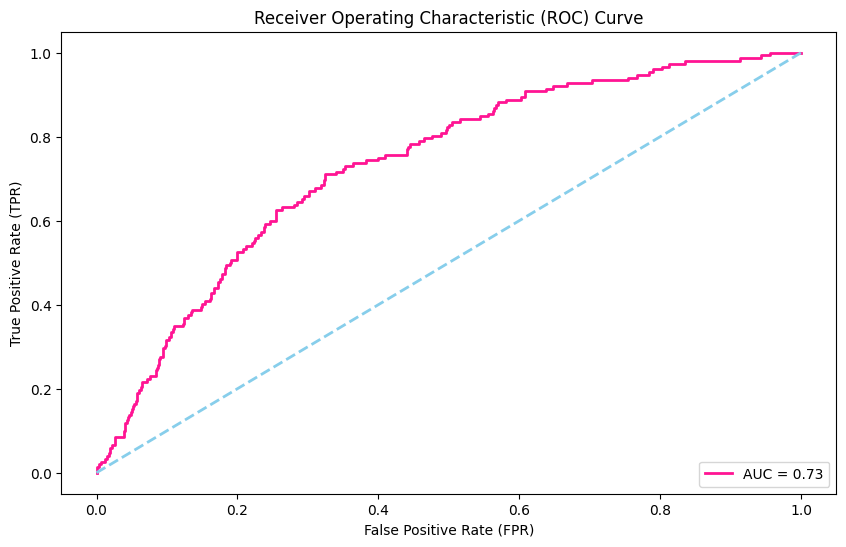

In [57]:

# 예측 확률 얻기
y_val_pred = model.predict_proba(X_val)[:, 1]

# FPR, TPR 계산
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)

# AUC 계산
roc_auc = auc(fpr, tpr)

# AUROC 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='#FF1493', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='skyblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Ptb_xl의 test 진행( 10% 데이터)

In [58]:
# 모델로 예측 수행
y_test_pred = model.predict(X_test)

In [59]:
cross_entropy = log_loss(y_test, y_test_pred, labels=[0, 1])
print(f'Cross-Entropy: {cross_entropy}')

Cross-Entropy: 2.4966016797049035


In [60]:


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# True Positive, False Positive, False Negative, True Negative
tp, fp, fn, tn = conf_matrix.ravel()

# Sensitivity (Recall)
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

# Precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision}")

# F1 Score
f1 = f1_score(y_test, y_test_pred)
print(f"F1 Score: {f1}")

# AUROC
y_test_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)
print(f"AUROC: {roc_auc}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

Confusion Matrix:
[[2029    0]
 [ 151    0]]
Sensitivity (Recall): 0.9307339449541284
Specificity: nan
Precision: 0.0
F1 Score: 0.0


/tmp/ipykernel_879712/2345697393.py:14: RuntimeWarning: invalid value encountered in scalar divide
  specificity = tn / (tn + fp)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUROC: 0.7265511017400017
Precision-Recall AUC: 0.1545854288180127


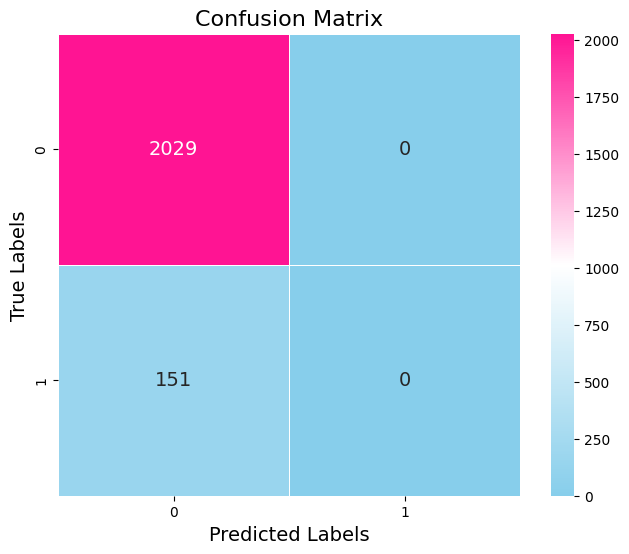

In [61]:
from matplotlib.colors import LinearSegmentedColormap

# 예측과 정답을 기반으로 Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_test_pred)

# 사용자 정의 그라데이션 컬러맵 생성
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['skyblue', 'white', '#FF1493'], N=256)

# Matplotlib을 사용하여 Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, cbar=True, 
            annot_kws={"size": 14}, linewidths=.5, square=True)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

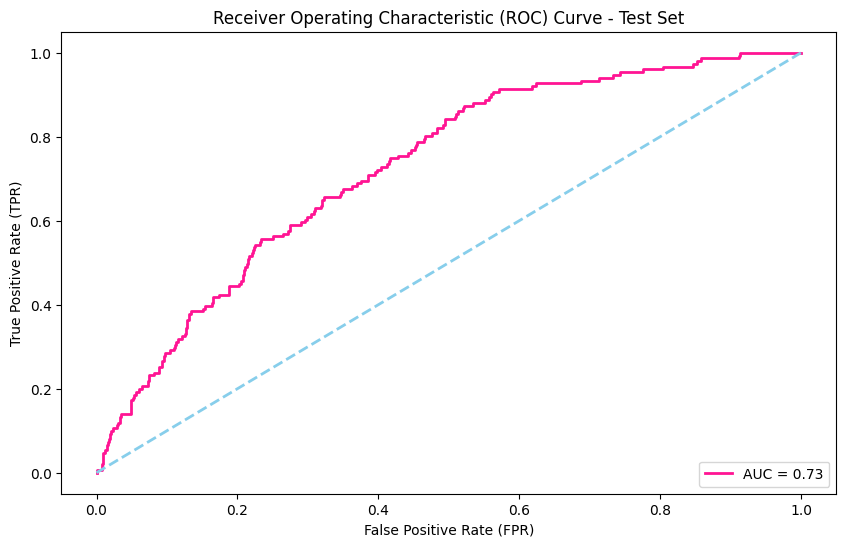

In [62]:
# 예측 확률 얻기
y_test_pred = model.predict_proba(X_test)[:, 1]

# FPR, TPR 계산
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)

# AUC 계산
roc_auc_test = auc(fpr_test, tpr_test)

# AUROC 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(fpr_test, tpr_test, color='#FF1493', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='skyblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc='lower right')
plt.show()

### SPH 데이터 테스트 진행

In [63]:
# 모델로 예측 수행
y_sph_pred = model.predict(X_sph_test)

In [64]:
cross_entropy = log_loss(y_sph_test, y_sph_pred, labels=[0, 1])
print(f'Cross-Entropy: {cross_entropy}')

Cross-Entropy: 0.9441003507044657


In [65]:


# Confusion Matrix
conf_matrix = confusion_matrix(y_sph_test, y_sph_pred)
print("Confusion Matrix:")
print(conf_matrix)

# True Positive, False Positive, False Negative, True Negative
tp, fp, fn, tn = conf_matrix.ravel()

# Sensitivity (Recall)
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

# Precision
precision = precision_score(y_sph_test, y_sph_pred)
print(f"Precision: {precision}")

# F1 Score
f1 = f1_score(y_sph_test, y_sph_pred)
print(f"F1 Score: {f1}")

# AUROC
y_sph_prob = model.predict_proba(X_sph_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_sph_test, y_sph_prob)
roc_auc = auc(fpr, tpr)
print(f"AUROC: {roc_auc}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_sph_test, y_sph_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

Confusion Matrix:
[[25095     0]
 [  675     0]]
Sensitivity (Recall): 0.9738067520372526
Specificity: nan
Precision: 0.0
F1 Score: 0.0


/tmp/ipykernel_879712/1869508326.py:14: RuntimeWarning: invalid value encountered in scalar divide
  specificity = tn / (tn + fp)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUROC: 0.6555164153992605
Precision-Recall AUC: 0.04536570209251524


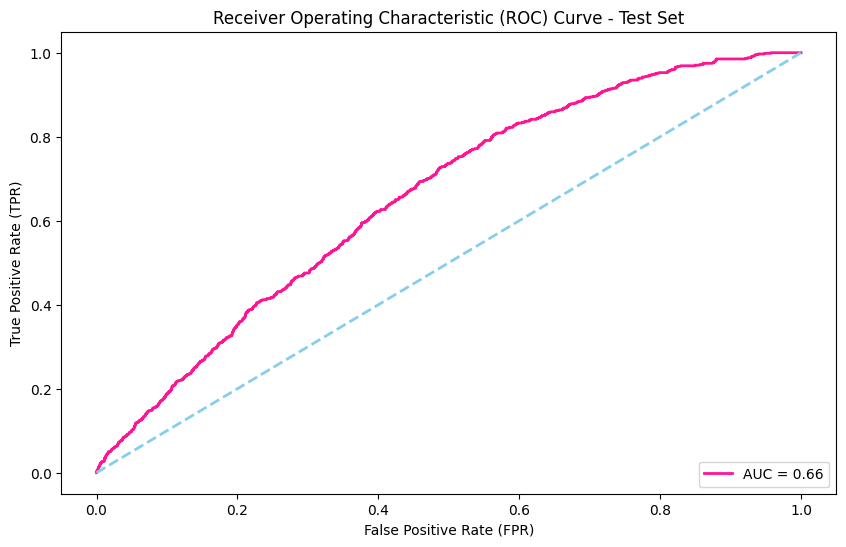

In [66]:
# 예측 확률 얻기
y_test_pred = model.predict_proba(X_sph_test)[:, 1]

# FPR, TPR 계산
fpr_test, tpr_test, thresholds_test = roc_curve(y_sph_test, y_test_pred)

# AUC 계산
roc_auc_test = auc(fpr_test, tpr_test)

# AUROC 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(fpr_test, tpr_test, color='#FF1493', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='skyblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc='lower right')
plt.show()


In [56]:
import ast
import wfdb
import h5py

from glob import glob
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.decomposition import PCA         
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve, auc

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification

from xgboost.sklearn import XGBClassifier
# import lightgbm as lgb  

In [57]:
res = os.getcwd()
base_path = os.path.join(res)
base_path_ptb = os.path.join(res, 'ptb_xl_data') + '/'
base_path_shp = os.path.join(res, 'sph_data') + '/'

In [58]:
df_ptb_origin = pd.read_csv(base_path_ptb + 'ptbxl_database.csv', encoding='utf-8',index_col='ecg_id')
df_sph_origin = pd.read_csv(base_path_shp + 'metadata.csv', encoding='utf-8', index_col='ECG_ID')

In [59]:
df_ptb_lead1 = pd.read_csv(base_path + '/custom_file/ashton_ptb_lead1.csv', index_col=0)

df_sph_lead1 = pd.read_csv(base_path + '/custom_file/ashton_sph_lead1.csv', index_col=0)

In [60]:
#PTB 라벨링

#scp_codes 에서 AFIB에 해당하는 것에 대해서 라벨링
df_ptb_origin.scp_codes = df_ptb_origin.scp_codes.apply(lambda x: ast.literal_eval(x))
df_ptb_origin.scp_codes = df_ptb_origin.scp_codes.apply(lambda x: list(x.keys()))
df_ptb_origin['label'] = df_ptb_origin.scp_codes.apply(lambda arr: 1 if 'AFIB' in arr else 0)

print('df_ptb_origin : ',df_ptb_origin.label.value_counts())
print('-'*15)

#SHP 라벨링

# df_sph_origin['label'] = df_sph_origin['AHA_Code'].apply(lambda x: 1 if '50' in str(x) else 0) - 기존에 잘못된
# 'AHA_Code' 컬럼의 각 값에 대해 '50'이 포함되어 있는지 확인하고, 'label' 컬럼 생성
def check_contains_50(code):
    # 공백을 없애고, ';' 또는 '+'로 분리
    numbers = code.replace(' ', '').replace('+', ';').split(';')
    # '50'이 포함되어 있는지 확인
    return '50' in numbers
# 'label' 컬럼 생성
df_sph_origin['label'] = df_sph_origin['AHA_Code'].apply(check_contains_50).astype(int)


print('df_sph_origin : ',df_sph_origin.label.value_counts())

df_ptb_origin :  label
0    20285
1     1514
Name: count, dtype: int64
---------------
df_sph_origin :  label
0    25095
1      675
Name: count, dtype: int64


In [61]:
df_ptb = pd.concat([df_ptb_origin[['age', 'sex', 'label']], df_ptb_lead1], axis=1)

df_sph_lead1.index = df_sph_origin.index
df_sph = pd.concat([df_sph_origin[['Age', 'Sex', 'label']], df_sph_lead1], axis=1)

In [62]:
outlier_list=[  103,   143,   158,   172,   750,   812,  1009,  1077,  1140,
        1606,  2022,  2031,  2304,  2676,  2767,  2814,  2837,  3055,
        3169,  3237,  3540,  3695,  3837,  3924,  3974,  4099,  4421,
        4588,  4748,  4787,  5123,  5133,  5141,  5167,  5337,  5482,
        5506,  5515,  5562,  5566,  5656,  5658,  5772,  5983,  6260,
        6278,  6319,  6503,  6521,  6577,  6678,  6746,  6899,  7066,
        7293,  7374,  7470,  7533,  7644,  7740,  8107,  8117,  8264,
        8503,  8641,  8706,  8724,  8773,  8913,  8926,  9168,  9451,
        9572,  9579,  9606,  9632,  9914,  9934, 10228, 10574, 10789,
       10952, 11096, 11123, 11160, 11296, 11343, 11397, 12195, 12343,
       12466, 12470, 12731, 12762, 12870, 13071, 13370, 13617, 13764,
       13873, 14226, 14362, 14451, 14543, 14646, 14726, 14823, 15055,
       15127, 15153, 15328, 15362, 15614, 15991, 16268, 16519, 16811,
       16953, 17106, 17205, 17392, 17413]
outlier_list =reversed(outlier_list)

In [63]:
df_ptb_outlier_drop = df_ptb.copy()  
for i in outlier_list:
    df_ptb_outlier_drop = df_ptb_outlier_drop.drop(df_ptb_outlier_drop.index[i])


In [64]:
X = df_ptb_outlier_drop.drop(['age', 'sex', 'label'], axis=1)
y = df_ptb_outlier_drop['label']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

X_sph_test = df_sph.drop(['Age', 'Sex', 'label'], axis=1)
y_sph_test = df_sph['label']


In [65]:
from sklearn.preprocessing import Normalizer     

In [66]:
# scaler_std = StandardScaler()
scaler_std = Normalizer()  #최종 결과물이 75%가나옴
# scaler_std = MinMaxScaler()
# scaler_std = RobustScaler()
X_train = scaler_std.fit_transform(X_train)
X_val = scaler_std.transform(X_val)
X_test = scaler_std.transform(X_test)
X_sph_test = scaler_std.transform(X_sph_test)

In [67]:
from imblearn.combine import *

In [68]:
print(X_train.shape)
print(y_train.shape)

(17341, 5000)
(17341,)


In [14]:
# X_samp, y_samp = SMOTETomek(random_state=42).fit_resample(X_train, y_train)

# print(X_samp.shape)
# print(y_samp.shape)

# X_train = X_samp
# y_train = y_samp

In [69]:
from imblearn.under_sampling import TomekLinks

In [70]:

X_samp, y_samp = SMOTETomek(random_state=42).fit_resample(X_train, y_train)

print(X_samp.shape)
print(y_samp.shape)

X_train = X_samp
y_train = y_samp

(32276, 5000)
(32276,)


### 옵튜나1

In [16]:
# import optuna
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from xgboost import XGBClassifier
# from sklearn.ensemble import RandomForestClassifier
# from catboost import CatBoostClassifier
# from lightgbm import LGBMClassifier



# # XGBoost 모델에 대한 objective 함수 정의

# def xgb_objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 200),
#         'max_depth': trial.suggest_int('max_depth', 4, 10),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'subsample': trial.suggest_float('subsample', 0.6, 1.0),
#         'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-9, 1.0),
#         # Add other XGBoost hyperparameters...

#         # Fixing random parameters
#         'random_state': 42,
#         'n_jobs': -1,
#     }

#     model = XGBClassifier(**params)
#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_val)
#     accuracy = accuracy_score(y_val, y_pred)
#     return accuracy

# # RandomForest 모델에 대한 objective 함수 정의
# def rf_objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 200),
#         'max_depth': trial.suggest_int('max_depth', 4, 10),
#         'min_samples_leaf': trial.suggest_categorical('min_samples_leaf', [8, 12, 18]),
#         'min_samples_split': trial.suggest_categorical('min_samples_split', [2, 5, 10]),

#         'random_state': 42,
 
#     }

#     model = RandomForestClassifier(**params)
#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_val)
#     accuracy = accuracy_score(y_val, y_pred)
#     return accuracy

# # CatBoost 모델에 대한 objective 함수 정의


# def catboost_objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 200),
#         'depth': trial.suggest_int('depth', 4, 10),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
#         'random_state': 42,
#     }


#     model = CatBoostClassifier(**params)
#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_val)
#     accuracy = accuracy_score(y_val, y_pred)
#     return accuracy

# # LGBM 모델에 대한 objective 함수 정의
# def lgbm_objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 200),
#         'max_depth': trial.suggest_int('max_depth', 4, 10),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
#         'random_state': 42
#     }

#     model = LGBMClassifier(**params)
#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_val)
#     accuracy = accuracy_score(y_val, y_pred)
#     return accuracy

# # Optuna 스터디 생성 및 실행 (XGBoost)
# xgb_study = optuna.create_study(direction='maximize')
# xgb_study.optimize(xgb_objective, n_trials=30)
# best_params_xgb = xgb_study.best_params
# print("XGBoost - 최적의 하이퍼파라미터:", best_params_xgb)

# # Optuna 스터디 생성 및 실행 (RandomForest)
# rf_study = optuna.create_study(direction='maximize')
# rf_study.optimize(rf_objective, n_trials=30)
# best_params_rf = rf_study.best_params
# print("RandomForest - 최적의 하이퍼파라미터:", best_params_rf)

# # Optuna 스터디 생성 및 실행 (CatBoost)
# catboost_study = optuna.create_study(direction='maximize')
# catboost_study.optimize(catboost_objective, n_trials=30)
# best_params_catboost = catboost_study.best_params
# print("CatBoost - 최적의 하이퍼파라미터:", best_params_catboost)

# # Optuna 스터디 생성 및 실행 (LGBM)
# lgbm_study = optuna.create_study(direction='maximize')
# lgbm_study.optimize(lgbm_objective, n_trials=30)
# best_params_lgbm = lgbm_study.best_params
# print("LGBM - 최적의 하이퍼파라미터:", best_params_lgbm)


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-11-27 14:10:13,876] A new study created in memory with name: no-name-4bfbc0e9-4ff1-4df2-8988-f743c3bda67f
/tmp/ipykernel_903196/957358219.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_903196/957358219.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-9, 1.0),
[I 2023-11-27

XGBoost - 최적의 하이퍼파라미터: {'n_estimators': 199, 'max_depth': 10, 'learning_rate': 0.09970153772587603, 'min_child_weight': 1, 'subsample': 0.6045342725237628, 'reg_lambda': 0.045745215390969}


[I 2023-11-27 15:46:06,997] Trial 0 finished with value: 0.8560885608856088 and parameters: {'n_estimators': 181, 'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 10}. Best is trial 0 with value: 0.8560885608856088.
[I 2023-11-27 15:55:27,545] Trial 1 finished with value: 0.8874538745387454 and parameters: {'n_estimators': 181, 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}. Best is trial 1 with value: 0.8874538745387454.
[I 2023-11-27 16:00:50,253] Trial 2 finished with value: 0.878690036900369 and parameters: {'n_estimators': 105, 'max_depth': 10, 'min_samples_leaf': 12, 'min_samples_split': 2}. Best is trial 1 with value: 0.8874538745387454.
[I 2023-11-27 16:04:15,681] Trial 3 finished with value: 0.7472324723247232 and parameters: {'n_estimators': 148, 'max_depth': 4, 'min_samples_leaf': 12, 'min_samples_split': 2}. Best is trial 1 with value: 0.8874538745387454.
[I 2023-11-27 16:08:17,226] Trial 4 finished with value: 0.8053505535055351 and parameters:

RandomForest - 최적의 하이퍼파라미터: {'n_estimators': 181, 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
0:	learn: 0.6887306	total: 506ms	remaining: 1m 39s
1:	learn: 0.6847571	total: 819ms	remaining: 1m 20s
2:	learn: 0.6808547	total: 1.13s	remaining: 1m 13s
3:	learn: 0.6773294	total: 1.45s	remaining: 1m 10s
4:	learn: 0.6736155	total: 1.76s	remaining: 1m 7s
5:	learn: 0.6700882	total: 2.06s	remaining: 1m 6s
6:	learn: 0.6667469	total: 2.38s	remaining: 1m 4s
7:	learn: 0.6633553	total: 2.69s	remaining: 1m 3s
8:	learn: 0.6601797	total: 2.99s	remaining: 1m 2s
9:	learn: 0.6570284	total: 3.31s	remaining: 1m 2s
10:	learn: 0.6541826	total: 3.62s	remaining: 1m 1s
11:	learn: 0.6510718	total: 3.92s	remaining: 1m
12:	learn: 0.6480203	total: 4.23s	remaining: 1m
13:	learn: 0.6453193	total: 4.55s	remaining: 59.8s
14:	learn: 0.6426312	total: 4.86s	remaining: 59.2s
15:	learn: 0.6401623	total: 5.16s	remaining: 58.6s
16:	learn: 0.6375645	total: 5.47s	remaining: 58.2s
17:	learn: 0.6349625	total: 5.7

[I 2023-11-27 19:14:30,648] Trial 0 finished with value: 0.8099630996309963 and parameters: {'n_estimators': 198, 'depth': 6, 'learning_rate': 0.056861722048570776}. Best is trial 0 with value: 0.8099630996309963.
/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6930210	total: 199ms	remaining: 24.1s
1:	learn: 0.6928985	total: 361ms	remaining: 21.6s
2:	learn: 0.6927823	total: 519ms	remaining: 20.6s
3:	learn: 0.6926592	total: 675ms	remaining: 19.9s
4:	learn: 0.6925381	total: 824ms	remaining: 19.3s
5:	learn: 0.6924249	total: 983ms	remaining: 19s
6:	learn: 0.6923100	total: 1.13s	remaining: 18.6s
7:	learn: 0.6922009	total: 1.28s	remaining: 18.2s
8:	learn: 0.6920761	total: 1.43s	remaining: 18s
9:	learn: 0.6919546	total: 1.59s	remaining: 17.8s
10:	learn: 0.6918420	total: 1.74s	remaining: 17.6s
11:	learn: 0.6917158	total: 1.9s	remaining: 17.4s
12:	learn: 0.6916114	total: 2.06s	remaining: 17.3s
13:	learn: 0.6915001	total: 2.21s	remaining: 17.1s
14:	learn: 0.6913764	total: 2.37s	remaining: 16.9s
15:	learn: 0.6912575	total: 2.52s	remaining: 16.7s
16:	learn: 0.6911550	total: 2.69s	remaining: 16.6s
17:	learn: 0.6910426	total: 2.84s	remaining: 16.4s
18:	learn: 0.6909271	total: 2.99s	remaining: 16.2s
19:	learn: 0.6908156	total: 3.14s	remaining: 1

[I 2023-11-27 19:16:56,769] Trial 1 finished with value: 0.6540590405904059 and parameters: {'n_estimators': 122, 'depth': 4, 'learning_rate': 0.0025549703614426177}. Best is trial 0 with value: 0.8099630996309963.
/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6927747	total: 742ms	remaining: 1m 36s
1:	learn: 0.6924881	total: 1.23s	remaining: 1m 19s
2:	learn: 0.6921534	total: 1.72s	remaining: 1m 13s
3:	learn: 0.6918381	total: 2.22s	remaining: 1m 10s
4:	learn: 0.6915228	total: 2.7s	remaining: 1m 8s
5:	learn: 0.6911673	total: 3.2s	remaining: 1m 6s
6:	learn: 0.6908403	total: 3.69s	remaining: 1m 5s
7:	learn: 0.6904901	total: 4.14s	remaining: 1m 3s
8:	learn: 0.6901330	total: 4.63s	remaining: 1m 2s
9:	learn: 0.6897746	total: 5.11s	remaining: 1m 1s
10:	learn: 0.6894349	total: 5.59s	remaining: 1m 1s
11:	learn: 0.6890971	total: 6.05s	remaining: 1m
12:	learn: 0.6887742	total: 6.53s	remaining: 59.3s
13:	learn: 0.6884867	total: 7.01s	remaining: 58.6s
14:	learn: 0.6881434	total: 7.49s	remaining: 57.9s
15:	learn: 0.6878408	total: 7.98s	remaining: 57.3s
16:	learn: 0.6875186	total: 8.45s	remaining: 56.7s
17:	learn: 0.6871530	total: 8.92s	remaining: 56s
18:	learn: 0.6868605	total: 9.4s	remaining: 55.4s
19:	learn: 0.6865388	total: 9.89s	remaining: 

[I 2023-11-27 19:20:08,947] Trial 2 finished with value: 0.7273985239852399 and parameters: {'n_estimators': 131, 'depth': 7, 'learning_rate': 0.0036771989781170036}. Best is trial 0 with value: 0.8099630996309963.
/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6929760	total: 738ms	remaining: 1m 16s
1:	learn: 0.6928448	total: 1.23s	remaining: 1m 2s
2:	learn: 0.6926916	total: 1.73s	remaining: 58.1s
3:	learn: 0.6925468	total: 2.22s	remaining: 55.5s
4:	learn: 0.6923983	total: 2.7s	remaining: 53.5s
5:	learn: 0.6922390	total: 3.19s	remaining: 52.1s
6:	learn: 0.6920675	total: 3.68s	remaining: 51s
7:	learn: 0.6919140	total: 4.16s	remaining: 49.9s
8:	learn: 0.6917486	total: 4.63s	remaining: 48.8s
9:	learn: 0.6915944	total: 5.12s	remaining: 48.1s
10:	learn: 0.6914285	total: 5.61s	remaining: 47.4s
11:	learn: 0.6912724	total: 6.07s	remaining: 46.5s
12:	learn: 0.6911282	total: 6.55s	remaining: 45.9s
13:	learn: 0.6909827	total: 7.04s	remaining: 45.2s
14:	learn: 0.6908239	total: 7.51s	remaining: 44.6s
15:	learn: 0.6906570	total: 7.98s	remaining: 43.9s
16:	learn: 0.6905000	total: 8.47s	remaining: 43.4s
17:	learn: 0.6903482	total: 8.95s	remaining: 42.8s
18:	learn: 0.6902038	total: 9.43s	remaining: 42.2s
19:	learn: 0.6900497	total: 9.91s	remaining

[I 2023-11-27 19:23:15,081] Trial 3 finished with value: 0.7075645756457565 and parameters: {'n_estimators': 104, 'depth': 7, 'learning_rate': 0.0016802872148537027}. Best is trial 0 with value: 0.8099630996309963.
/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6911602	total: 304ms	remaining: 31.3s
1:	learn: 0.6894151	total: 531ms	remaining: 27.1s
2:	learn: 0.6877256	total: 763ms	remaining: 25.7s
3:	learn: 0.6859595	total: 988ms	remaining: 24.7s
4:	learn: 0.6842762	total: 1.22s	remaining: 24.1s
5:	learn: 0.6827546	total: 1.44s	remaining: 23.6s
6:	learn: 0.6812989	total: 1.66s	remaining: 23s
7:	learn: 0.6798322	total: 1.88s	remaining: 22.6s
8:	learn: 0.6782807	total: 2.12s	remaining: 22.3s
9:	learn: 0.6768221	total: 2.34s	remaining: 22s
10:	learn: 0.6753507	total: 2.57s	remaining: 21.7s
11:	learn: 0.6738846	total: 2.79s	remaining: 21.4s
12:	learn: 0.6725438	total: 3.01s	remaining: 21.1s
13:	learn: 0.6711574	total: 3.24s	remaining: 20.8s
14:	learn: 0.6697683	total: 3.46s	remaining: 20.5s
15:	learn: 0.6685198	total: 3.69s	remaining: 20.3s
16:	learn: 0.6672173	total: 3.92s	remaining: 20.1s
17:	learn: 0.6659987	total: 4.13s	remaining: 19.7s
18:	learn: 0.6645511	total: 4.34s	remaining: 19.4s
19:	learn: 0.6632543	total: 4.55s	remaining: 

[I 2023-11-27 19:25:46,031] Trial 4 finished with value: 0.724169741697417 and parameters: {'n_estimators': 104, 'depth': 5, 'learning_rate': 0.03046106944504784}. Best is trial 0 with value: 0.8099630996309963.


103:	learn: 0.5867155	total: 22.3s	remaining: 0us


/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6920255	total: 2.48s	remaining: 5m 10s
1:	learn: 0.6910544	total: 4.95s	remaining: 5m 6s
2:	learn: 0.6898445	total: 7.44s	remaining: 5m 5s
3:	learn: 0.6887366	total: 9.96s	remaining: 5m 3s
4:	learn: 0.6875451	total: 12.5s	remaining: 5m 2s
5:	learn: 0.6864663	total: 15s	remaining: 5m
6:	learn: 0.6852984	total: 17.6s	remaining: 4m 59s
7:	learn: 0.6841659	total: 20.1s	remaining: 4m 56s
8:	learn: 0.6830447	total: 22.7s	remaining: 4m 54s
9:	learn: 0.6818372	total: 25.2s	remaining: 4m 52s
10:	learn: 0.6808005	total: 27.7s	remaining: 4m 49s
11:	learn: 0.6796721	total: 30.2s	remaining: 4m 47s
12:	learn: 0.6784789	total: 32.8s	remaining: 4m 44s
13:	learn: 0.6773347	total: 35.3s	remaining: 4m 42s
14:	learn: 0.6762131	total: 37.8s	remaining: 4m 39s
15:	learn: 0.6750244	total: 40.3s	remaining: 4m 37s
16:	learn: 0.6740232	total: 42.9s	remaining: 4m 34s
17:	learn: 0.6728909	total: 45.4s	remaining: 4m 32s
18:	learn: 0.6717864	total: 47.9s	remaining: 4m 29s
19:	learn: 0.6706990	total: 50.5

[I 2023-11-27 19:33:24,483] Trial 5 finished with value: 0.815959409594096 and parameters: {'n_estimators': 126, 'depth': 10, 'learning_rate': 0.005459915102879743}. Best is trial 5 with value: 0.815959409594096.


125:	learn: 0.5758931	total: 5m 19s	remaining: 0us


/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6915880	total: 2.53s	remaining: 7m 18s
1:	learn: 0.6902405	total: 4.99s	remaining: 7m 9s
2:	learn: 0.6885634	total: 7.54s	remaining: 7m 9s
3:	learn: 0.6870301	total: 10.1s	remaining: 7m 7s
4:	learn: 0.6854340	total: 12.6s	remaining: 7m 6s
5:	learn: 0.6837479	total: 15.2s	remaining: 7m 5s
6:	learn: 0.6821639	total: 17.7s	remaining: 7m 3s
7:	learn: 0.6806108	total: 20.3s	remaining: 7m 1s
8:	learn: 0.6790710	total: 22.9s	remaining: 6m 59s
9:	learn: 0.6774024	total: 25.4s	remaining: 6m 57s
10:	learn: 0.6758520	total: 28s	remaining: 6m 54s
11:	learn: 0.6743073	total: 30.5s	remaining: 6m 52s
12:	learn: 0.6727904	total: 33.1s	remaining: 6m 49s
13:	learn: 0.6712816	total: 35.6s	remaining: 6m 47s
14:	learn: 0.6698010	total: 38.2s	remaining: 6m 44s
15:	learn: 0.6681404	total: 40.7s	remaining: 6m 42s
16:	learn: 0.6665025	total: 43.3s	remaining: 6m 39s
17:	learn: 0.6650631	total: 45.9s	remaining: 6m 37s
18:	learn: 0.6635775	total: 48.4s	remaining: 6m 35s
19:	learn: 0.6620790	total: 51s

[I 2023-11-27 19:43:07,585] Trial 6 finished with value: 0.8321033210332104 and parameters: {'n_estimators': 174, 'depth': 10, 'learning_rate': 0.007600476361803904}. Best is trial 6 with value: 0.8321033210332104.


173:	learn: 0.5085518	total: 7m 24s	remaining: 0us


/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6901584	total: 752ms	remaining: 1m 43s
1:	learn: 0.6878857	total: 1.24s	remaining: 1m 24s
2:	learn: 0.6852670	total: 1.73s	remaining: 1m 18s
3:	learn: 0.6827006	total: 2.22s	remaining: 1m 14s
4:	learn: 0.6800729	total: 2.72s	remaining: 1m 12s
5:	learn: 0.6774877	total: 3.21s	remaining: 1m 11s
6:	learn: 0.6748801	total: 3.69s	remaining: 1m 9s
7:	learn: 0.6725675	total: 4.18s	remaining: 1m 8s
8:	learn: 0.6701512	total: 4.67s	remaining: 1m 7s
9:	learn: 0.6678669	total: 5.14s	remaining: 1m 6s
10:	learn: 0.6655593	total: 5.62s	remaining: 1m 5s
11:	learn: 0.6633427	total: 6.11s	remaining: 1m 4s
12:	learn: 0.6609799	total: 6.58s	remaining: 1m 3s
13:	learn: 0.6586206	total: 7.05s	remaining: 1m 2s
14:	learn: 0.6565710	total: 7.51s	remaining: 1m 2s
15:	learn: 0.6544872	total: 7.99s	remaining: 1m 1s
16:	learn: 0.6523503	total: 8.48s	remaining: 1m
17:	learn: 0.6503053	total: 8.94s	remaining: 1m
18:	learn: 0.6484117	total: 9.45s	remaining: 59.7s
19:	learn: 0.6464470	total: 9.93s	remaini

[I 2023-11-27 19:46:29,618] Trial 7 finished with value: 0.7772140221402214 and parameters: {'n_estimators': 139, 'depth': 7, 'learning_rate': 0.0300336757364718}. Best is trial 6 with value: 0.8321033210332104.
/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6930220	total: 302ms	remaining: 40.8s
1:	learn: 0.6929122	total: 523ms	remaining: 35.1s
2:	learn: 0.6928163	total: 745ms	remaining: 33s
3:	learn: 0.6927156	total: 962ms	remaining: 31.8s
4:	learn: 0.6926028	total: 1.19s	remaining: 31.1s
5:	learn: 0.6924853	total: 1.41s	remaining: 30.5s
6:	learn: 0.6923873	total: 1.62s	remaining: 29.9s
7:	learn: 0.6922738	total: 1.84s	remaining: 29.4s
8:	learn: 0.6921724	total: 2.06s	remaining: 29.1s
9:	learn: 0.6920618	total: 2.27s	remaining: 28.6s
10:	learn: 0.6919640	total: 2.49s	remaining: 28.3s
11:	learn: 0.6918455	total: 2.71s	remaining: 28s
12:	learn: 0.6917363	total: 2.94s	remaining: 27.8s
13:	learn: 0.6916407	total: 3.15s	remaining: 27.4s
14:	learn: 0.6915303	total: 3.36s	remaining: 27.1s
15:	learn: 0.6914244	total: 3.58s	remaining: 26.9s
16:	learn: 0.6913127	total: 3.8s	remaining: 26.6s
17:	learn: 0.6912024	total: 4.02s	remaining: 26.4s
18:	learn: 0.6911001	total: 4.23s	remaining: 26.1s
19:	learn: 0.6910050	total: 4.45s	remaining: 2

[I 2023-11-27 19:49:07,627] Trial 8 finished with value: 0.6595940959409594 and parameters: {'n_estimators': 136, 'depth': 5, 'learning_rate': 0.001860198348048224}. Best is trial 6 with value: 0.8321033210332104.
/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6930436	total: 209ms	remaining: 33.4s
1:	learn: 0.6929501	total: 369ms	remaining: 29.4s
2:	learn: 0.6928623	total: 531ms	remaining: 28s
3:	learn: 0.6927678	total: 684ms	remaining: 26.9s
4:	learn: 0.6926778	total: 842ms	remaining: 26.3s
5:	learn: 0.6925916	total: 996ms	remaining: 25.7s
6:	learn: 0.6925101	total: 1.15s	remaining: 25.4s
7:	learn: 0.6924206	total: 1.31s	remaining: 25.2s
8:	learn: 0.6923245	total: 1.48s	remaining: 24.9s
9:	learn: 0.6922413	total: 1.63s	remaining: 24.6s
10:	learn: 0.6921499	total: 1.79s	remaining: 24.4s
11:	learn: 0.6920666	total: 1.94s	remaining: 24.1s
12:	learn: 0.6919736	total: 2.1s	remaining: 24s
13:	learn: 0.6918833	total: 2.27s	remaining: 23.8s
14:	learn: 0.6917986	total: 2.42s	remaining: 23.6s
15:	learn: 0.6917105	total: 2.57s	remaining: 23.3s
16:	learn: 0.6916124	total: 2.73s	remaining: 23.1s
17:	learn: 0.6915205	total: 2.88s	remaining: 22.9s
18:	learn: 0.6914252	total: 3.03s	remaining: 22.7s
19:	learn: 0.6913423	total: 3.19s	remaining: 2

[I 2023-11-27 19:51:43,874] Trial 9 finished with value: 0.6411439114391144 and parameters: {'n_estimators': 161, 'depth': 4, 'learning_rate': 0.0020213331141121717}. Best is trial 6 with value: 0.8321033210332104.


160:	learn: 0.6797512	total: 26s	remaining: 0us


/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6913059	total: 2.52s	remaining: 7m 21s
1:	learn: 0.6897155	total: 5.11s	remaining: 7m 24s
2:	learn: 0.6877266	total: 7.71s	remaining: 7m 24s
3:	learn: 0.6858050	total: 10.3s	remaining: 7m 22s
4:	learn: 0.6838395	total: 12.9s	remaining: 7m 21s
5:	learn: 0.6820871	total: 15.4s	remaining: 7m 17s
6:	learn: 0.6801969	total: 17.9s	remaining: 7m 13s
7:	learn: 0.6783361	total: 20.5s	remaining: 7m 10s
8:	learn: 0.6764924	total: 23.1s	remaining: 7m 8s
9:	learn: 0.6746629	total: 25.7s	remaining: 7m 6s
10:	learn: 0.6730218	total: 28.3s	remaining: 7m 3s
11:	learn: 0.6711889	total: 30.9s	remaining: 7m 1s
12:	learn: 0.6694711	total: 33.4s	remaining: 6m 59s
13:	learn: 0.6676942	total: 36s	remaining: 6m 56s
14:	learn: 0.6658805	total: 38.6s	remaining: 6m 54s
15:	learn: 0.6639915	total: 41.3s	remaining: 6m 52s
16:	learn: 0.6625147	total: 43.8s	remaining: 6m 49s
17:	learn: 0.6607286	total: 46.5s	remaining: 6m 47s
18:	learn: 0.6589790	total: 49s	remaining: 6m 45s
19:	learn: 0.6571917	total: 51

[I 2023-11-27 20:01:35,477] Trial 10 finished with value: 0.830719557195572 and parameters: {'n_estimators': 176, 'depth': 10, 'learning_rate': 0.008986421556932956}. Best is trial 6 with value: 0.8321033210332104.


175:	learn: 0.4927074	total: 7m 31s	remaining: 0us


/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6907586	total: 2.54s	remaining: 7m 21s
1:	learn: 0.6886988	total: 5.16s	remaining: 7m 26s
2:	learn: 0.6861282	total: 7.78s	remaining: 7m 25s
3:	learn: 0.6836505	total: 10.3s	remaining: 7m 22s
4:	learn: 0.6811201	total: 12.9s	remaining: 7m 19s
5:	learn: 0.6788669	total: 15.5s	remaining: 7m 16s
6:	learn: 0.6764411	total: 18.1s	remaining: 7m 13s
7:	learn: 0.6741094	total: 20.6s	remaining: 7m 10s
8:	learn: 0.6717199	total: 23.1s	remaining: 7m 6s
9:	learn: 0.6694861	total: 25.7s	remaining: 7m 3s
10:	learn: 0.6672023	total: 28.2s	remaining: 7m 1s
11:	learn: 0.6649077	total: 30.8s	remaining: 6m 59s
12:	learn: 0.6626557	total: 33.4s	remaining: 6m 56s
13:	learn: 0.6604010	total: 36s	remaining: 6m 54s
14:	learn: 0.6580014	total: 38.6s	remaining: 6m 51s
15:	learn: 0.6556212	total: 41.2s	remaining: 6m 49s
16:	learn: 0.6533150	total: 43.8s	remaining: 6m 46s
17:	learn: 0.6511943	total: 46.4s	remaining: 6m 44s
18:	learn: 0.6490238	total: 49s	remaining: 6m 41s
19:	learn: 0.6468182	total: 5

[I 2023-11-27 20:11:16,617] Trial 11 finished with value: 0.8357933579335793 and parameters: {'n_estimators': 175, 'depth': 10, 'learning_rate': 0.011679910210063062}. Best is trial 11 with value: 0.8357933579335793.


174:	learn: 0.4696333	total: 7m 28s	remaining: 0us


/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6911677	total: 2.41s	remaining: 7m 3s
1:	learn: 0.6893584	total: 3.87s	remaining: 5m 38s
2:	learn: 0.6873454	total: 5.32s	remaining: 5m 8s
3:	learn: 0.6854498	total: 6.8s	remaining: 4m 54s
4:	learn: 0.6835608	total: 8.24s	remaining: 4m 43s
5:	learn: 0.6815960	total: 9.72s	remaining: 4m 37s
6:	learn: 0.6797444	total: 11.2s	remaining: 4m 32s
7:	learn: 0.6778890	total: 12.7s	remaining: 4m 28s
8:	learn: 0.6761829	total: 14.2s	remaining: 4m 24s
9:	learn: 0.6743789	total: 15.7s	remaining: 4m 21s
10:	learn: 0.6724865	total: 17.2s	remaining: 4m 18s
11:	learn: 0.6706870	total: 18.6s	remaining: 4m 15s
12:	learn: 0.6688534	total: 20s	remaining: 4m 12s
13:	learn: 0.6670740	total: 21.5s	remaining: 4m 10s
14:	learn: 0.6653973	total: 23s	remaining: 4m 8s
15:	learn: 0.6635798	total: 24.5s	remaining: 4m 6s
16:	learn: 0.6617856	total: 25.9s	remaining: 4m 4s
17:	learn: 0.6600971	total: 27.4s	remaining: 4m 2s
18:	learn: 0.6583950	total: 28.9s	remaining: 4m
19:	learn: 0.6566837	total: 30.4s	rem

[I 2023-11-27 20:17:47,346] Trial 12 finished with value: 0.8113468634686347 and parameters: {'n_estimators': 177, 'depth': 9, 'learning_rate': 0.012147715359843422}. Best is trial 11 with value: 0.8357933579335793.
/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6929747	total: 2.42s	remaining: 6m 37s
1:	learn: 0.6928163	total: 3.89s	remaining: 5m 17s
2:	learn: 0.6926434	total: 5.37s	remaining: 4m 49s
3:	learn: 0.6924744	total: 6.83s	remaining: 4m 35s
4:	learn: 0.6923048	total: 8.27s	remaining: 4m 24s
5:	learn: 0.6921274	total: 9.77s	remaining: 4m 18s
6:	learn: 0.6919603	total: 11.2s	remaining: 4m 13s
7:	learn: 0.6917956	total: 12.7s	remaining: 4m 8s
8:	learn: 0.6916397	total: 14.2s	remaining: 4m 6s
9:	learn: 0.6914904	total: 15.7s	remaining: 4m 2s
10:	learn: 0.6913218	total: 17.1s	remaining: 3m 59s
11:	learn: 0.6911519	total: 18.6s	remaining: 3m 56s
12:	learn: 0.6909961	total: 20s	remaining: 3m 53s
13:	learn: 0.6908359	total: 21.5s	remaining: 3m 51s
14:	learn: 0.6906753	total: 22.9s	remaining: 3m 49s
15:	learn: 0.6905043	total: 24.4s	remaining: 3m 47s
16:	learn: 0.6903509	total: 25.9s	remaining: 3m 45s
17:	learn: 0.6901935	total: 27.3s	remaining: 3m 43s
18:	learn: 0.6900261	total: 28.8s	remaining: 3m 41s
19:	learn: 0.6898617	total:

[I 2023-11-27 20:24:06,293] Trial 13 finished with value: 0.7633763837638377 and parameters: {'n_estimators': 165, 'depth': 9, 'learning_rate': 0.0010460684537725391}. Best is trial 11 with value: 0.8357933579335793.
/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6918091	total: 2.43s	remaining: 7m 41s
1:	learn: 0.6905815	total: 3.9s	remaining: 6m 8s
2:	learn: 0.6893553	total: 5.32s	remaining: 5m 33s
3:	learn: 0.6880565	total: 6.76s	remaining: 5m 15s
4:	learn: 0.6867633	total: 8.21s	remaining: 5m 5s
5:	learn: 0.6854150	total: 9.7s	remaining: 4m 58s
6:	learn: 0.6841354	total: 11.2s	remaining: 4m 53s
7:	learn: 0.6829045	total: 12.6s	remaining: 4m 48s
8:	learn: 0.6817233	total: 14.1s	remaining: 4m 44s
9:	learn: 0.6804767	total: 15.6s	remaining: 4m 42s
10:	learn: 0.6792297	total: 17.1s	remaining: 4m 39s
11:	learn: 0.6779467	total: 18.5s	remaining: 4m 36s
12:	learn: 0.6767444	total: 20s	remaining: 4m 34s
13:	learn: 0.6755713	total: 21.5s	remaining: 4m 31s
14:	learn: 0.6742898	total: 23s	remaining: 4m 29s
15:	learn: 0.6730119	total: 24.4s	remaining: 4m 27s
16:	learn: 0.6716927	total: 26s	remaining: 4m 25s
17:	learn: 0.6705291	total: 27.4s	remaining: 4m 23s
18:	learn: 0.6693385	total: 29s	remaining: 4m 22s
19:	learn: 0.6681659	total: 30.4s	

[I 2023-11-27 20:30:51,906] Trial 14 finished with value: 0.808579335793358 and parameters: {'n_estimators': 191, 'depth': 9, 'learning_rate': 0.008192418325190071}. Best is trial 11 with value: 0.8357933579335793.
/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6911642	total: 1.3s	remaining: 3m 16s
1:	learn: 0.6893284	total: 2.1s	remaining: 2m 37s
2:	learn: 0.6873449	total: 2.9s	remaining: 2m 23s
3:	learn: 0.6853906	total: 3.72s	remaining: 2m 17s
4:	learn: 0.6835947	total: 4.52s	remaining: 2m 12s
5:	learn: 0.6818241	total: 5.31s	remaining: 2m 9s
6:	learn: 0.6801530	total: 6.11s	remaining: 2m 6s
7:	learn: 0.6783733	total: 6.9s	remaining: 2m 4s
8:	learn: 0.6765625	total: 7.68s	remaining: 2m 2s
9:	learn: 0.6748040	total: 8.46s	remaining: 2m
10:	learn: 0.6731708	total: 9.26s	remaining: 1m 58s
11:	learn: 0.6715331	total: 10s	remaining: 1m 57s
12:	learn: 0.6699112	total: 10.8s	remaining: 1m 55s
13:	learn: 0.6682919	total: 11.6s	remaining: 1m 54s
14:	learn: 0.6666423	total: 12.4s	remaining: 1m 53s
15:	learn: 0.6651378	total: 13.2s	remaining: 1m 52s
16:	learn: 0.6635789	total: 14s	remaining: 1m 51s
17:	learn: 0.6618405	total: 14.8s	remaining: 1m 50s
18:	learn: 0.6603957	total: 15.6s	remaining: 1m 49s
19:	learn: 0.6589020	total: 16.4s	rema

[I 2023-11-27 20:35:05,422] Trial 15 finished with value: 0.7762915129151291 and parameters: {'n_estimators': 152, 'depth': 8, 'learning_rate': 0.015686524207618326}. Best is trial 11 with value: 0.8357933579335793.
/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6920783	total: 2.56s	remaining: 7m 40s
1:	learn: 0.6911531	total: 5.11s	remaining: 7m 37s
2:	learn: 0.6900002	total: 7.75s	remaining: 7m 39s
3:	learn: 0.6888469	total: 10.3s	remaining: 7m 37s
4:	learn: 0.6877594	total: 12.9s	remaining: 7m 34s
5:	learn: 0.6867302	total: 15.5s	remaining: 7m 31s
6:	learn: 0.6856163	total: 18.1s	remaining: 7m 29s
7:	learn: 0.6845340	total: 20.6s	remaining: 7m 25s
8:	learn: 0.6834107	total: 23.1s	remaining: 7m 22s
9:	learn: 0.6822587	total: 25.7s	remaining: 7m 20s
10:	learn: 0.6812013	total: 28.3s	remaining: 7m 17s
11:	learn: 0.6801254	total: 30.9s	remaining: 7m 15s
12:	learn: 0.6790792	total: 33.5s	remaining: 7m 13s
13:	learn: 0.6780228	total: 36.1s	remaining: 7m 10s
14:	learn: 0.6769271	total: 38.7s	remaining: 7m 8s
15:	learn: 0.6757921	total: 41.3s	remaining: 7m 5s
16:	learn: 0.6748378	total: 43.8s	remaining: 7m 2s
17:	learn: 0.6738085	total: 46.4s	remaining: 7m
18:	learn: 0.6727448	total: 49s	remaining: 6m 58s
19:	learn: 0.6716868	total: 51.

[I 2023-11-27 20:45:08,926] Trial 16 finished with value: 0.830719557195572 and parameters: {'n_estimators': 181, 'depth': 10, 'learning_rate': 0.0052007793336263175}. Best is trial 11 with value: 0.8357933579335793.


180:	learn: 0.5444673	total: 7m 55s	remaining: 0us


/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6907926	total: 1.3s	remaining: 3m 25s
1:	learn: 0.6886171	total: 2.12s	remaining: 2m 46s
2:	learn: 0.6862721	total: 2.93s	remaining: 2m 32s
3:	learn: 0.6839649	total: 3.76s	remaining: 2m 25s
4:	learn: 0.6818468	total: 4.57s	remaining: 2m 20s
5:	learn: 0.6798051	total: 5.4s	remaining: 2m 17s
6:	learn: 0.6778433	total: 6.22s	remaining: 2m 15s
7:	learn: 0.6757599	total: 7.03s	remaining: 2m 12s
8:	learn: 0.6735375	total: 7.85s	remaining: 2m 10s
9:	learn: 0.6716734	total: 8.64s	remaining: 2m 8s
10:	learn: 0.6697643	total: 9.45s	remaining: 2m 7s
11:	learn: 0.6676593	total: 10.3s	remaining: 2m 5s
12:	learn: 0.6657243	total: 11.1s	remaining: 2m 4s
13:	learn: 0.6638240	total: 11.9s	remaining: 2m 3s
14:	learn: 0.6619196	total: 12.7s	remaining: 2m 2s
15:	learn: 0.6600287	total: 13.5s	remaining: 2m 1s
16:	learn: 0.6582634	total: 14.3s	remaining: 1m 59s
17:	learn: 0.6563112	total: 15.1s	remaining: 1m 58s
18:	learn: 0.6546461	total: 16s	remaining: 1m 57s
19:	learn: 0.6528359	total: 16.8s

[I 2023-11-27 20:49:36,454] Trial 17 finished with value: 0.7878228782287823 and parameters: {'n_estimators': 159, 'depth': 8, 'learning_rate': 0.01866242657993833}. Best is trial 11 with value: 0.8357933579335793.
/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6922970	total: 1.28s	remaining: 3m 57s
1:	learn: 0.6915071	total: 2.08s	remaining: 3m 12s
2:	learn: 0.6905983	total: 2.87s	remaining: 2m 56s
3:	learn: 0.6897471	total: 3.7s	remaining: 2m 49s
4:	learn: 0.6889413	total: 4.53s	remaining: 2m 44s
5:	learn: 0.6881703	total: 5.32s	remaining: 2m 40s
6:	learn: 0.6874036	total: 6.13s	remaining: 2m 37s
7:	learn: 0.6866925	total: 6.93s	remaining: 2m 35s
8:	learn: 0.6859302	total: 7.75s	remaining: 2m 33s
9:	learn: 0.6851622	total: 8.54s	remaining: 2m 31s
10:	learn: 0.6843998	total: 9.34s	remaining: 2m 29s
11:	learn: 0.6836180	total: 10.1s	remaining: 2m 27s
12:	learn: 0.6828314	total: 10.9s	remaining: 2m 26s
13:	learn: 0.6820245	total: 11.8s	remaining: 2m 25s
14:	learn: 0.6812504	total: 12.6s	remaining: 2m 23s
15:	learn: 0.6804667	total: 13.3s	remaining: 2m 22s
16:	learn: 0.6796772	total: 14.1s	remaining: 2m 21s
17:	learn: 0.6788454	total: 14.9s	remaining: 2m 20s
18:	learn: 0.6781536	total: 15.8s	remaining: 2m 19s
19:	learn: 0.6774123	to

[I 2023-11-27 20:54:13,519] Trial 18 finished with value: 0.775830258302583 and parameters: {'n_estimators': 187, 'depth': 8, 'learning_rate': 0.0066760945667585555}. Best is trial 11 with value: 0.8357933579335793.
/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6924638	total: 2.4s	remaining: 6m 47s
1:	learn: 0.6918349	total: 3.86s	remaining: 5m 26s
2:	learn: 0.6911423	total: 5.39s	remaining: 5m 1s
3:	learn: 0.6904745	total: 6.83s	remaining: 4m 44s
4:	learn: 0.6898061	total: 8.28s	remaining: 4m 34s
5:	learn: 0.6891232	total: 9.81s	remaining: 4m 29s
6:	learn: 0.6884582	total: 11.3s	remaining: 4m 24s
7:	learn: 0.6878073	total: 12.8s	remaining: 4m 20s
8:	learn: 0.6871986	total: 14.3s	remaining: 4m 16s
9:	learn: 0.6865603	total: 15.8s	remaining: 4m 13s
10:	learn: 0.6859041	total: 17.3s	remaining: 4m 10s
11:	learn: 0.6852295	total: 18.7s	remaining: 4m 7s
12:	learn: 0.6846209	total: 20.2s	remaining: 4m 5s
13:	learn: 0.6839936	total: 21.7s	remaining: 4m 3s
14:	learn: 0.6833747	total: 23.1s	remaining: 4m
15:	learn: 0.6827150	total: 24.7s	remaining: 3m 59s
16:	learn: 0.6821267	total: 26.1s	remaining: 3m 56s
17:	learn: 0.6815223	total: 27.6s	remaining: 3m 54s
18:	learn: 0.6809119	total: 29.2s	remaining: 3m 53s
19:	learn: 0.6802804	total: 30.

[I 2023-11-27 21:00:40,892] Trial 19 finished with value: 0.7919741697416974 and parameters: {'n_estimators': 171, 'depth': 9, 'learning_rate': 0.004172213258612615}. Best is trial 11 with value: 0.8357933579335793.
/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6910545	total: 2.56s	remaining: 6m 14s
1:	learn: 0.6892486	total: 5.11s	remaining: 6m 10s
2:	learn: 0.6869922	total: 7.8s	remaining: 6m 14s
3:	learn: 0.6848147	total: 10.4s	remaining: 6m 12s
4:	learn: 0.6825886	total: 13s	remaining: 6m 9s
5:	learn: 0.6806054	total: 15.6s	remaining: 6m 6s
6:	learn: 0.6784679	total: 18.5s	remaining: 6m 9s
7:	learn: 0.6764112	total: 21.3s	remaining: 6m 9s
8:	learn: 0.6745210	total: 23.9s	remaining: 6m 5s
9:	learn: 0.6724570	total: 26.6s	remaining: 6m 4s
10:	learn: 0.6703585	total: 29.3s	remaining: 6m 2s
11:	learn: 0.6683259	total: 31.9s	remaining: 5m 59s
12:	learn: 0.6662284	total: 34.6s	remaining: 5m 56s
13:	learn: 0.6642305	total: 37.1s	remaining: 5m 52s
14:	learn: 0.6621910	total: 39.9s	remaining: 5m 50s
15:	learn: 0.6600746	total: 42.6s	remaining: 5m 49s
16:	learn: 0.6580220	total: 45.5s	remaining: 5m 47s
17:	learn: 0.6561131	total: 48.4s	remaining: 5m 46s
18:	learn: 0.6541524	total: 51.3s	remaining: 5m 45s
19:	learn: 0.6522035	total: 54.2

[I 2023-11-27 21:09:26,298] Trial 20 finished with value: 0.830719557195572 and parameters: {'n_estimators': 147, 'depth': 10, 'learning_rate': 0.010221360456954516}. Best is trial 11 with value: 0.8357933579335793.


146:	learn: 0.4984114	total: 6m 34s	remaining: 0us


/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6914629	total: 2.9s	remaining: 8m 19s
1:	learn: 0.6900060	total: 5.82s	remaining: 8m 18s
2:	learn: 0.6881949	total: 8.77s	remaining: 8m 16s
3:	learn: 0.6865397	total: 11.7s	remaining: 8m 13s
4:	learn: 0.6846978	total: 14.7s	remaining: 8m 12s
5:	learn: 0.6828805	total: 17.6s	remaining: 8m 8s
6:	learn: 0.6811478	total: 20.5s	remaining: 8m 5s
7:	learn: 0.6794730	total: 23.3s	remaining: 8m
8:	learn: 0.6778160	total: 26.2s	remaining: 7m 56s
9:	learn: 0.6760356	total: 29.1s	remaining: 7m 53s
10:	learn: 0.6742280	total: 31.9s	remaining: 7m 49s
11:	learn: 0.6725692	total: 34.8s	remaining: 7m 47s
12:	learn: 0.6709391	total: 37.7s	remaining: 7m 43s
13:	learn: 0.6691674	total: 40.5s	remaining: 7m 39s
14:	learn: 0.6675395	total: 43.4s	remaining: 7m 36s
15:	learn: 0.6657345	total: 46.3s	remaining: 7m 34s
16:	learn: 0.6642804	total: 49.1s	remaining: 7m 30s
17:	learn: 0.6626386	total: 52.1s	remaining: 7m 29s
18:	learn: 0.6610329	total: 55s	remaining: 7m 26s
19:	learn: 0.6594296	total: 57.

[I 2023-11-27 21:19:08,647] Trial 21 finished with value: 0.830719557195572 and parameters: {'n_estimators': 173, 'depth': 10, 'learning_rate': 0.008218478995315543}. Best is trial 11 with value: 0.8357933579335793.


172:	learn: 0.5019172	total: 7m 32s	remaining: 0us


/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6905966	total: 2.78s	remaining: 8m 30s
1:	learn: 0.6883983	total: 5.57s	remaining: 8m 29s
2:	learn: 0.6856564	total: 8.45s	remaining: 8m 32s
3:	learn: 0.6830160	total: 11.3s	remaining: 8m 30s
4:	learn: 0.6803199	total: 14.1s	remaining: 8m 28s
5:	learn: 0.6779204	total: 17s	remaining: 8m 25s
6:	learn: 0.6754545	total: 19.8s	remaining: 8m 24s
7:	learn: 0.6729174	total: 22.7s	remaining: 8m 21s
8:	learn: 0.6704104	total: 25.5s	remaining: 8m 17s
9:	learn: 0.6680605	total: 28.3s	remaining: 8m 15s
10:	learn: 0.6657182	total: 31.2s	remaining: 8m 13s
11:	learn: 0.6632733	total: 34.1s	remaining: 8m 11s
12:	learn: 0.6608901	total: 37s	remaining: 8m 10s
13:	learn: 0.6585155	total: 39.9s	remaining: 8m 6s
14:	learn: 0.6561966	total: 42.7s	remaining: 8m 4s
15:	learn: 0.6537010	total: 45.5s	remaining: 8m
16:	learn: 0.6514985	total: 48.3s	remaining: 7m 57s
17:	learn: 0.6492451	total: 51.2s	remaining: 7m 55s
18:	learn: 0.6469227	total: 53.8s	remaining: 7m 50s
19:	learn: 0.6445830	total: 56.4

[I 2023-11-27 21:29:16,438] Trial 22 finished with value: 0.8371771217712177 and parameters: {'n_estimators': 185, 'depth': 10, 'learning_rate': 0.012478459575598701}. Best is trial 22 with value: 0.8371771217712177.


184:	learn: 0.4588521	total: 8m	remaining: 0us


/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6907005	total: 2.41s	remaining: 7m 52s
1:	learn: 0.6884698	total: 3.86s	remaining: 6m 16s
2:	learn: 0.6860462	total: 5.35s	remaining: 5m 45s
3:	learn: 0.6836412	total: 6.83s	remaining: 5m 29s
4:	learn: 0.6813307	total: 8.27s	remaining: 5m 17s
5:	learn: 0.6790866	total: 9.77s	remaining: 5m 10s
6:	learn: 0.6768420	total: 11.2s	remaining: 5m 4s
7:	learn: 0.6744752	total: 12.7s	remaining: 4m 59s
8:	learn: 0.6721783	total: 14.2s	remaining: 4m 55s
9:	learn: 0.6699895	total: 15.6s	remaining: 4m 52s
10:	learn: 0.6678337	total: 17.1s	remaining: 4m 49s
11:	learn: 0.6656515	total: 18.6s	remaining: 4m 46s
12:	learn: 0.6634363	total: 20.1s	remaining: 4m 44s
13:	learn: 0.6611913	total: 21.6s	remaining: 4m 42s
14:	learn: 0.6592174	total: 23.1s	remaining: 4m 39s
15:	learn: 0.6571129	total: 24.5s	remaining: 4m 37s
16:	learn: 0.6550704	total: 26.1s	remaining: 4m 36s
17:	learn: 0.6529622	total: 27.5s	remaining: 4m 33s
18:	learn: 0.6508893	total: 29.1s	remaining: 4m 32s
19:	learn: 0.6489262	to

[I 2023-11-27 21:36:17,210] Trial 23 finished with value: 0.8284132841328413 and parameters: {'n_estimators': 197, 'depth': 9, 'learning_rate': 0.015041326982086791}. Best is trial 22 with value: 0.8371771217712177.
/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6917930	total: 2.51s	remaining: 7m 43s
1:	learn: 0.6906216	total: 5.07s	remaining: 7m 46s
2:	learn: 0.6891632	total: 7.61s	remaining: 7m 44s
3:	learn: 0.6878118	total: 10.2s	remaining: 7m 43s
4:	learn: 0.6864394	total: 12.7s	remaining: 7m 39s
5:	learn: 0.6851412	total: 15.2s	remaining: 7m 36s
6:	learn: 0.6837382	total: 17.8s	remaining: 7m 34s
7:	learn: 0.6824522	total: 20.3s	remaining: 7m 31s
8:	learn: 0.6810978	total: 22.8s	remaining: 7m 28s
9:	learn: 0.6796491	total: 25.4s	remaining: 7m 26s
10:	learn: 0.6782913	total: 27.9s	remaining: 7m 24s
11:	learn: 0.6770334	total: 30.5s	remaining: 7m 22s
12:	learn: 0.6757036	total: 33.1s	remaining: 7m 20s
13:	learn: 0.6743798	total: 35.6s	remaining: 7m 17s
14:	learn: 0.6730154	total: 38.2s	remaining: 7m 15s
15:	learn: 0.6715951	total: 40.7s	remaining: 7m 12s
16:	learn: 0.6704011	total: 43.3s	remaining: 7m 10s
17:	learn: 0.6691081	total: 45.9s	remaining: 7m 8s
18:	learn: 0.6677837	total: 48.4s	remaining: 7m 5s
19:	learn: 0.6664567	tot

[I 2023-11-27 21:46:21,504] Trial 24 finished with value: 0.8334870848708487 and parameters: {'n_estimators': 186, 'depth': 10, 'learning_rate': 0.006596786036812458}. Best is trial 22 with value: 0.8371771217712177.


185:	learn: 0.5178259	total: 8m 2s	remaining: 0us


/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6896534	total: 2.41s	remaining: 7m 27s
1:	learn: 0.6864834	total: 3.87s	remaining: 5m 58s
2:	learn: 0.6829810	total: 5.33s	remaining: 5m 27s
3:	learn: 0.6797013	total: 6.82s	remaining: 5m 12s
4:	learn: 0.6764636	total: 8.26s	remaining: 5m
5:	learn: 0.6733541	total: 9.74s	remaining: 4m 53s
6:	learn: 0.6702262	total: 11.2s	remaining: 4m 47s
7:	learn: 0.6669311	total: 12.7s	remaining: 4m 43s
8:	learn: 0.6638710	total: 14.2s	remaining: 4m 40s
9:	learn: 0.6608480	total: 15.6s	remaining: 4m 36s
10:	learn: 0.6583091	total: 17.1s	remaining: 4m 33s
11:	learn: 0.6552387	total: 18.6s	remaining: 4m 31s
12:	learn: 0.6524045	total: 20.1s	remaining: 4m 28s
13:	learn: 0.6494623	total: 21.5s	remaining: 4m 26s
14:	learn: 0.6467217	total: 23s	remaining: 4m 24s
15:	learn: 0.6441216	total: 24.5s	remaining: 4m 21s
16:	learn: 0.6413684	total: 26s	remaining: 4m 19s
17:	learn: 0.6386164	total: 27.5s	remaining: 4m 18s
18:	learn: 0.6358413	total: 29s	remaining: 4m 16s
19:	learn: 0.6331357	total: 30.5

[I 2023-11-27 21:52:59,403] Trial 25 finished with value: 0.8214944649446494 and parameters: {'n_estimators': 187, 'depth': 9, 'learning_rate': 0.021572845269611268}. Best is trial 22 with value: 0.8371771217712177.
/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6916188	total: 1.3s	remaining: 3m 57s
1:	learn: 0.6902007	total: 2.1s	remaining: 3m 11s
2:	learn: 0.6885778	total: 2.89s	remaining: 2m 54s
3:	learn: 0.6870626	total: 3.71s	remaining: 2m 47s
4:	learn: 0.6856676	total: 4.52s	remaining: 2m 41s
5:	learn: 0.6842614	total: 5.32s	remaining: 2m 37s
6:	learn: 0.6829555	total: 6.13s	remaining: 2m 34s
7:	learn: 0.6817079	total: 6.92s	remaining: 2m 32s
8:	learn: 0.6803742	total: 7.73s	remaining: 2m 30s
9:	learn: 0.6789783	total: 8.52s	remaining: 2m 28s
10:	learn: 0.6776812	total: 9.31s	remaining: 2m 26s
11:	learn: 0.6763885	total: 10.1s	remaining: 2m 24s
12:	learn: 0.6751107	total: 10.9s	remaining: 2m 23s
13:	learn: 0.6737228	total: 11.7s	remaining: 2m 22s
14:	learn: 0.6724164	total: 12.5s	remaining: 2m 20s
15:	learn: 0.6711335	total: 13.3s	remaining: 2m 19s
16:	learn: 0.6698615	total: 14.1s	remaining: 2m 18s
17:	learn: 0.6685486	total: 14.9s	remaining: 2m 17s
18:	learn: 0.6673347	total: 15.7s	remaining: 2m 16s
19:	learn: 0.6661366	tot

[I 2023-11-27 21:57:28,643] Trial 26 finished with value: 0.7845940959409594 and parameters: {'n_estimators': 184, 'depth': 8, 'learning_rate': 0.012059259478739938}. Best is trial 22 with value: 0.8371771217712177.
/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6919363	total: 2.55s	remaining: 8m 26s
1:	learn: 0.6908889	total: 5.16s	remaining: 8m 30s
2:	learn: 0.6895837	total: 7.77s	remaining: 8m 30s
3:	learn: 0.6883891	total: 10.4s	remaining: 8m 28s
4:	learn: 0.6871047	total: 13s	remaining: 8m 26s
5:	learn: 0.6859440	total: 15.6s	remaining: 8m 23s
6:	learn: 0.6846859	total: 18.1s	remaining: 8m 20s
7:	learn: 0.6835075	total: 20.7s	remaining: 8m 17s
8:	learn: 0.6823001	total: 23.2s	remaining: 8m 12s
9:	learn: 0.6810003	total: 25.8s	remaining: 8m 9s
10:	learn: 0.6798845	total: 28.4s	remaining: 8m 8s
11:	learn: 0.6787547	total: 31s	remaining: 8m 5s
12:	learn: 0.6775586	total: 33.6s	remaining: 8m 3s
13:	learn: 0.6763695	total: 36.2s	remaining: 8m 1s
14:	learn: 0.6751343	total: 38.9s	remaining: 7m 59s
15:	learn: 0.6738557	total: 41.4s	remaining: 7m 56s
16:	learn: 0.6727798	total: 44s	remaining: 7m 54s
17:	learn: 0.6716159	total: 46.6s	remaining: 7m 51s
18:	learn: 0.6704203	total: 49.2s	remaining: 7m 49s
19:	learn: 0.6692309	total: 51.8s

[I 2023-11-27 22:08:08,402] Trial 27 finished with value: 0.8270295202952029 and parameters: {'n_estimators': 200, 'depth': 10, 'learning_rate': 0.005894539994045657}. Best is trial 22 with value: 0.8371771217712177.


199:	learn: 0.5220253	total: 8m 38s	remaining: 0us


/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6913242	total: 2.39s	remaining: 7m 35s
1:	learn: 0.6896567	total: 3.85s	remaining: 6m 5s
2:	learn: 0.6878000	total: 5.32s	remaining: 5m 35s
3:	learn: 0.6860501	total: 6.79s	remaining: 5m 19s
4:	learn: 0.6843053	total: 8.22s	remaining: 5m 7s
5:	learn: 0.6825308	total: 9.73s	remaining: 5m 1s
6:	learn: 0.6808166	total: 11.2s	remaining: 4m 56s
7:	learn: 0.6791000	total: 12.7s	remaining: 4m 51s
8:	learn: 0.6775187	total: 14.2s	remaining: 4m 48s
9:	learn: 0.6758479	total: 15.7s	remaining: 4m 45s
10:	learn: 0.6740941	total: 17.2s	remaining: 4m 42s
11:	learn: 0.6723803	total: 18.6s	remaining: 4m 39s
12:	learn: 0.6707802	total: 20.1s	remaining: 4m 36s
13:	learn: 0.6691214	total: 21.5s	remaining: 4m 33s
14:	learn: 0.6674547	total: 22.9s	remaining: 4m 30s
15:	learn: 0.6657189	total: 24.4s	remaining: 4m 28s
16:	learn: 0.6639691	total: 25.9s	remaining: 4m 26s
17:	learn: 0.6624027	total: 27.4s	remaining: 4m 24s
18:	learn: 0.6608289	total: 28.8s	remaining: 4m 22s
19:	learn: 0.6593093	tota

[I 2023-11-27 22:15:03,333] Trial 28 finished with value: 0.8118081180811808 and parameters: {'n_estimators': 192, 'depth': 9, 'learning_rate': 0.011180591330098948}. Best is trial 22 with value: 0.8371771217712177.
/tmp/ipykernel_903196/957358219.py:61: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


0:	learn: 0.6857452	total: 2.52s	remaining: 8m 6s
1:	learn: 0.6794775	total: 5.09s	remaining: 8m 8s
2:	learn: 0.6718002	total: 7.66s	remaining: 8m 7s
3:	learn: 0.6646518	total: 10.3s	remaining: 8m 7s
4:	learn: 0.6577470	total: 12.8s	remaining: 8m 4s
5:	learn: 0.6503982	total: 15.4s	remaining: 8m 2s
6:	learn: 0.6433906	total: 17.9s	remaining: 7m 59s
7:	learn: 0.6367934	total: 20.5s	remaining: 7m 56s
8:	learn: 0.6302406	total: 23.1s	remaining: 7m 54s
9:	learn: 0.6241036	total: 25.6s	remaining: 7m 51s
10:	learn: 0.6175096	total: 28.2s	remaining: 7m 49s
11:	learn: 0.6130303	total: 30.8s	remaining: 7m 46s
12:	learn: 0.6073168	total: 33.4s	remaining: 7m 44s
13:	learn: 0.6015893	total: 35.9s	remaining: 7m 41s
14:	learn: 0.5959667	total: 38.5s	remaining: 7m 39s
15:	learn: 0.5901383	total: 41.1s	remaining: 7m 37s
16:	learn: 0.5845911	total: 43.7s	remaining: 7m 34s
17:	learn: 0.5798182	total: 46.3s	remaining: 7m 32s
18:	learn: 0.5753944	total: 48.8s	remaining: 7m 29s
19:	learn: 0.5701504	total: 

[I 2023-11-27 22:25:14,822] Trial 29 finished with value: 0.8523985239852399 and parameters: {'n_estimators': 194, 'depth': 10, 'learning_rate': 0.03680446425045185}. Best is trial 29 with value: 0.8523985239852399.
[I 2023-11-27 22:25:14,826] A new study created in memory with name: no-name-fe9b1fd0-39ec-451e-a66a-eb3fcbe90616


193:	learn: 0.3190923	total: 7m 58s	remaining: 0us
CatBoost - 최적의 하이퍼파라미터: {'n_estimators': 194, 'depth': 10, 'learning_rate': 0.03680446425045185}
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.316385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:26:30,987] Trial 0 finished with value: 0.7297047970479705 and parameters: {'n_estimators': 140, 'max_depth': 8, 'learning_rate': 0.0011526163086103631}. Best is trial 0 with value: 0.7297047970479705.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.259026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:27:47,967] Trial 1 finished with value: 0.8293357933579336 and parameters: {'n_estimators': 179, 'max_depth': 10, 'learning_rate': 0.019717207141548707}. Best is trial 1 with value: 0.8293357933579336.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.286448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2023-11-27 22:28:53,989] Trial 2 finished with value: 0.8178044280442804 and parameters: {'n_estimators': 182, 'max_depth': 6, 'learning_rate': 0.02516556281439638}. Best is trial 1 with value: 0.8293357933579336.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.291787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:30:16,223] Trial 3 finished with value: 0.7813653136531366 and parameters: {'n_estimators': 168, 'max_depth': 10, 'learning_rate': 0.003927209171911065}. Best is trial 1 with value: 0.8293357933579336.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.290703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:31:38,616] Trial 4 finished with value: 0.7670664206642066 and parameters: {'n_estimators': 171, 'max_depth': 7, 'learning_rate': 0.0028237708093926247}. Best is trial 1 with value: 0.8293357933579336.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.302090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2023-11-27 22:32:25,960] Trial 5 finished with value: 0.761070110701107 and parameters: {'n_estimators': 115, 'max_depth': 4, 'learning_rate': 0.024712540533549092}. Best is trial 1 with value: 0.8293357933579336.
/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.286115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:33:58,631] Trial 6 finished with value: 0.7375461254612546 and parameters: {'n_estimators': 198, 'max_depth': 8, 'learning_rate': 0.001281262859892238}. Best is trial 1 with value: 0.8293357933579336.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.275973 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:35:20,325] Trial 7 finished with value: 0.7845940959409594 and parameters: {'n_estimators': 164, 'max_depth': 8, 'learning_rate': 0.004211259890423643}. Best is trial 1 with value: 0.8293357933579336.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.282042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:36:36,501] Trial 8 finished with value: 0.7458487084870848 and parameters: {'n_estimators': 172, 'max_depth': 6, 'learning_rate': 0.0017324857716360133}. Best is trial 1 with value: 0.8293357933579336.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.289861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:37:44,223] Trial 9 finished with value: 0.8238007380073801 and parameters: {'n_estimators': 132, 'max_depth': 10, 'learning_rate': 0.025083521639413388}. Best is trial 1 with value: 0.8293357933579336.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.270355 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:38:58,132] Trial 10 finished with value: 0.8809963099630996 and parameters: {'n_estimators': 197, 'max_depth': 10, 'learning_rate': 0.07934404349678029}. Best is trial 10 with value: 0.8809963099630996.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.312690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:40:12,354] Trial 11 finished with value: 0.889760147601476 and parameters: {'n_estimators': 195, 'max_depth': 10, 'learning_rate': 0.0843700037939962}. Best is trial 11 with value: 0.889760147601476.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.312043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:41:23,651] Trial 12 finished with value: 0.8759225092250923 and parameters: {'n_estimators': 190, 'max_depth': 9, 'learning_rate': 0.08485351258446046}. Best is trial 11 with value: 0.889760147601476.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.296655 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-27 22:42:36,592] Trial 13 finished with value: 0.8851476014760148 and parameters: {'n_estimators': 199, 'max_depth': 9, 'learning_rate': 0.08469930314711145}. Best is trial 11 with value: 0.889760147601476.
/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.293256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-27 22:43:39,227] Trial 14 finished with value: 0.8842250922509225 and parameters: {'n_estimators': 146, 'max_depth': 9, 'learning_rate': 0.09924621086854407}. Best is trial 11 with value: 0.889760147601476.
/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.306489 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:44:45,315] Trial 15 finished with value: 0.8583948339483395 and parameters: {'n_estimators': 155, 'max_depth': 9, 'learning_rate': 0.05725171906122677}. Best is trial 11 with value: 0.889760147601476.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.334599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[I 2023-11-27 22:45:29,103] Trial 16 finished with value: 0.7762915129151291 and parameters: {'n_estimators': 101, 'max_depth': 4, 'learning_rate': 0.047150146291475216}. Best is trial 11 with value: 0.889760147601476.
/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.286863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:46:51,496] Trial 17 finished with value: 0.8201107011070111 and parameters: {'n_estimators': 188, 'max_depth': 9, 'learning_rate': 0.012623664815008076}. Best is trial 11 with value: 0.889760147601476.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.271691 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2023-11-27 22:48:03,623] Trial 18 finished with value: 0.8482472324723247 and parameters: {'n_estimators': 195, 'max_depth': 7, 'learning_rate': 0.03730570455635299}. Best is trial 11 with value: 0.889760147601476.
/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.302390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2023-11-27 22:49:12,033] Trial 19 finished with value: 0.8523985239852399 and parameters: {'n_estimators': 182, 'max_depth': 7, 'learning_rate': 0.055238659785972505}. Best is trial 11 with value: 0.889760147601476.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.303621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:50:16,156] Trial 20 finished with value: 0.8731549815498155 and parameters: {'n_estimators': 160, 'max_depth': 8, 'learning_rate': 0.09858826562321203}. Best is trial 11 with value: 0.889760147601476.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.260031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:51:17,680] Trial 21 finished with value: 0.8740774907749077 and parameters: {'n_estimators': 141, 'max_depth': 9, 'learning_rate': 0.09800702091048877}. Best is trial 11 with value: 0.889760147601476.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.283392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:52:22,487] Trial 22 finished with value: 0.863929889298893 and parameters: {'n_estimators': 149, 'max_depth': 9, 'learning_rate': 0.062142109611539875}. Best is trial 11 with value: 0.889760147601476.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.241845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:53:25,448] Trial 23 finished with value: 0.834409594095941 and parameters: {'n_estimators': 126, 'max_depth': 10, 'learning_rate': 0.036856591728247214}. Best is trial 11 with value: 0.889760147601476.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.287242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:54:30,154] Trial 24 finished with value: 0.8648523985239852 and parameters: {'n_estimators': 152, 'max_depth': 9, 'learning_rate': 0.06797519623585781}. Best is trial 11 with value: 0.889760147601476.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.295246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:55:36,330] Trial 25 finished with value: 0.8560885608856088 and parameters: {'n_estimators': 145, 'max_depth': 10, 'learning_rate': 0.04178215527644143}. Best is trial 11 with value: 0.889760147601476.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.274437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2023-11-27 22:56:35,185] Trial 26 finished with value: 0.8703874538745388 and parameters: {'n_estimators': 131, 'max_depth': 8, 'learning_rate': 0.09952017333233712}. Best is trial 11 with value: 0.889760147601476.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.276554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2023-11-27 22:57:35,797] Trial 27 finished with value: 0.8574723247232472 and parameters: {'n_estimators': 176, 'max_depth': 6, 'learning_rate': 0.06808117727642747}. Best is trial 11 with value: 0.889760147601476.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.271682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2023-11-27 22:58:32,729] Trial 28 finished with value: 0.8284132841328413 and parameters: {'n_estimators': 189, 'max_depth': 5, 'learning_rate': 0.046098901145993715}. Best is trial 11 with value: 0.889760147601476.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_903196/957358219.py:78: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.290600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2023-11-27 22:59:29,729] Trial 29 finished with value: 0.8473247232472325 and parameters: {'n_estimators': 116, 'max_depth': 8, 'learning_rate': 0.06900834807572599}. Best is trial 11 with value: 0.889760147601476.


LGBM - 최적의 하이퍼파라미터: {'n_estimators': 195, 'max_depth': 10, 'learning_rate': 0.0843700037939962}


XGBoost - 최적의 하이퍼파라미터: {'n_estimators': 199, 'max_depth': 10, 'learning_rate': 0.09970153772587603, 'min_child_weight': 1, 'subsample': 0.6045342725237628, 'reg_lambda': 0.045745215390969}

RandomForest - 최적의 하이퍼파라미터: {'n_estimators': 181, 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
CatBoost - 최적의 하이퍼파라미터: {'n_estimators': 194, 'depth': 10, 'learning_rate': 0.03680446425045185}
LGBM - 최적의 하이퍼파라미터: {'n_estimators': 195, 'max_depth': 10, 'learning_rate': 0.0843700037939962}

### 2

In [76]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier



# XGBoost 모델에 대한 objective 함수 정의

def xgb_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 150, 350),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.0008, 0.05),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-9, 1.0),
         'colsample_bynode': trial.suggest_float('colsample_bynode', 0.1, 1.0),  
        'gamma': trial.suggest_float('gamma', 0.0, 1.0),  
        'max_leaves': trial.suggest_int('max_leaves', 5, 30), 
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-9, 1.0), 
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.1, 10.0), 


        # Fixing random parameters
        'random_state': 42,
        'n_jobs': -1,
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# RandomForest 모델에 대한 objective 함수 정의
def rf_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 200),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.2),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'random_state': 42,
    }


    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return accuracy

# CatBoost 모델에 대한 objective 함수 정의


# def catboost_objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 200),
#         'depth': trial.suggest_int('depth', 4, 10),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
#         'random_state': 42,
#     }


#     model = CatBoostClassifier(**params)
#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_val)
#     accuracy = accuracy_score(y_val, y_pred)
#     return accuracy

# # LGBM 모델에 대한 objective 함수 정의
# def lgbm_objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 200),
#         'max_depth': trial.suggest_int('max_depth', 4, 10),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
#         'random_state': 42
#     }

#     model = LGBMClassifier(**params)
#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_val)
#     accuracy = accuracy_score(y_val, y_pred)
#     return accuracy


# Optuna 스터디 생성 및 실행 (RandomForest)
rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(rf_objective, n_trials=50)
best_params_rf = rf_study.best_params
print("RandomForest - 최적의 하이퍼파라미터:", best_params_rf)


# # Optuna 스터디 생성 및 실행 (XGBoost)
# xgb_study = optuna.create_study(direction='maximize')
# xgb_study.optimize(xgb_objective, n_trials=50)
# best_params_xgb = xgb_study.best_params
# print("XGBoost - 최적의 하이퍼파라미터:", best_params_xgb)

# # Optuna 스터디 생성 및 실행 (CatBoost)
# catboost_study = optuna.create_study(direction='maximize')
# catboost_study.optimize(catboost_objective, n_trials=30)
# best_params_catboost = catboost_study.best_params
# print("CatBoost - 최적의 하이퍼파라미터:", best_params_catboost)

# # Optuna 스터디 생성 및 실행 (LGBM)
# lgbm_study = optuna.create_study(direction='maximize')
# lgbm_study.optimize(lgbm_objective, n_trials=30)
# best_params_lgbm = lgbm_study.best_params
# print("LGBM - 최적의 하이퍼파라미터:", best_params_lgbm)


[I 2023-11-28 06:21:35,371] A new study created in memory with name: no-name-51bc512d-4f5b-422a-85ed-c97a53e3319d


[I 2023-11-28 06:22:21,261] Trial 0 finished with value: 0.9303505535055351 and parameters: {'n_estimators': 119, 'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 10, 'bootstrap': True, 'min_impurity_decrease': 0.18870724161519983, 'criterion': 'gini'}. Best is trial 0 with value: 0.9303505535055351.
[I 2023-11-28 06:23:25,171] Trial 1 finished with value: 0.9303505535055351 and parameters: {'n_estimators': 166, 'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 6, 'bootstrap': True, 'min_impurity_decrease': 0.1129462781291834, 'criterion': 'gini'}. Best is trial 0 with value: 0.9303505535055351.
[I 2023-11-28 06:25:18,140] Trial 2 finished with value: 0.9303505535055351 and parameters: {'n_estimators': 167, 'max_depth': 13, 'min_samples_leaf': 11, 'min_samples_split': 9, 'bootstrap': False, 'min_impurity_decrease': 0.17865944140960632, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9303505535055351.
[I 2023-11-28 06:26:34,205] Trial 3 finished with value: 

RandomForest - 최적의 하이퍼파라미터: {'n_estimators': 119, 'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 10, 'bootstrap': True, 'min_impurity_decrease': 0.18870724161519983, 'criterion': 'gini'}


In [21]:
# print("XGBoost - 최적의 하이퍼파라미터:", best_params_xgb)
# print("RandomForest - 최적의 하이퍼파라미터:", best_params_rf)
# print("CatBoost - 최적의 하이퍼파라미터:", best_params_catboost)
# print("LGBM - 최적의 하이퍼파라미터:", best_params_lgbm)



XGBoost - 최적의 하이퍼파라미터: {'n_estimators': 199, 'max_depth': 10, 'learning_rate': 0.09970153772587603, 'min_child_weight': 1, 'subsample': 0.6045342725237628, 'reg_lambda': 0.045745215390969}
RandomForest - 최적의 하이퍼파라미터: {'n_estimators': 181, 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
CatBoost - 최적의 하이퍼파라미터: {'n_estimators': 194, 'depth': 10, 'learning_rate': 0.03680446425045185}
LGBM - 최적의 하이퍼파라미터: {'n_estimators': 195, 'max_depth': 10, 'learning_rate': 0.0843700037939962}


In [ ]:
print("XGBoost - 최적의 하이퍼파라미터:", best_params_xgb)
print("RandomForest - 최적의 하이퍼파라미터:", best_params_rf)

In [ ]:
# RandomForest - 최적의 하이퍼파라미터: {'n_estimators': 119, 'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 10, 'bootstrap': True, 'min_impurity_decrease': 0.18870724161519983, 'criterion': 'gini'}

In [73]:
# 최적의 XGBoost 모델 생성 및 성능 평가
best_xgb_model = XGBClassifier(**best_params_xgb)
best_xgb_model.fit(X_train, y_train)

# AUROC 계산
y_val_prob_best_xgb = best_xgb_model.predict_proba(X_val)[:, 1]
auroc_best_xgb = roc_auc_score(y_val, y_val_prob_best_xgb)
print("XGBoost - AUROC:", auroc_best_xgb)

# Confusion Matrix 출력
y_val_pred_best_xgb = best_xgb_model.predict(X_val)
conf_matrix_best_xgb = confusion_matrix(y_val, y_val_pred_best_xgb)
print("XGBoost - Confusion Matrix:")
print(conf_matrix_best_xgb)

XGBoost - AUROC: 0.675713389828839
XGBoost - Confusion Matrix:
[[2017    0]
 [ 151    0]]


In [ ]:
# XGBoost - 최적의 하이퍼파라미터: {'n_estimators': 241, 'max_depth': 10, 'learning_rate': 0.0014197918298607828, 'min_child_weight': 2, 'subsample': 0.7670807581398686, 'reg_lambda': 0.12125393194668628, 'colsample_bynode': 0.6286439662904623, 'gamma': 0.38292946374250814, 'max_leaves': 23, 'reg_alpha': 1.65196256901293e-05, 'scale_pos_weight': 0.22459196018478267}

XGBoost - AUROC: 0.6928459091103107
XGBoost - Confusion Matrix:
[[1914  103]
 [ 131   20]]

 XGBoost - 최적의 하이퍼파라미터: {'n_estimators': 151, 'max_depth': 9, 'learning_rate': 0.06814493187400332, 'min_child_weight': 2, 'subsample': 0. 9262239413248325, 'reg_lambda': 3.3644408155377326e-08} 

In [ ]:
# RandomForest - 최적의 하이퍼파라미터: {'n_estimators': 119, 'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 10, 'bootstrap': True, 'min_impurity_decrease': 0.18870724161519983, 'criterion': 'gini'}

In [77]:
# 최적의 RandomForest 모델 생성 및 성능 평가
best_rf_model = RandomForestClassifier(**best_params_rf)
best_rf_model.fit(X_train, y_train)

# AUROC 계산
y_val_prob_best_rf = best_rf_model.predict_proba(X_val)[:, 1]
auroc_best_rf = roc_auc_score(y_val, y_val_prob_best_rf)
print("RandomForest - AUROC:", auroc_best_rf)

# Confusion Matrix 출력
y_val_pred_best_rf = best_rf_model.predict(X_val)
conf_matrix_best_rf = confusion_matrix(y_val, y_val_pred_best_rf)
print("RandomForest - Confusion Matrix:")
print(conf_matrix_best_rf)

RandomForest - AUROC: 0.5
RandomForest - Confusion Matrix:
[[2017    0]
 [ 151    0]]


RandomForest - AUROC: 0.6783269362734637
RandomForest - Confusion Matrix:
[[1554  463]
 [  85   66]]


RandomForest - 최적의 하이퍼파라미터: {'n_estimators': 149, 'max_depth': 4, 'min_samples_leaf': 18, 'min_samples_split': 5}


In [19]:
# # 최적의 CatBoost 모델 생성 및 성능 평가
# best_catboost_model = CatBoostClassifier(**best_params_catboost)
# best_catboost_model.fit(X_train, y_train, verbose=False)

# # AUROC 계산
# y_val_prob_best_catboost = best_catboost_model.predict_proba(X_val)[:, 1]
# auroc_best_catboost = roc_auc_score(y_val, y_val_prob_best_catboost)
# print("CatBoost - AUROC:", auroc_best_catboost)

# # Confusion Matrix 출력
# y_val_pred_best_catboost = best_catboost_model.predict(X_val)
# conf_matrix_best_catboost = confusion_matrix(y_val, y_val_pred_best_catboost)
# print("CatBoost - Confusion Matrix:")
# print(conf_matrix_best_catboost)

CatBoost - AUROC: 0.6755984725856709
CatBoost - Confusion Matrix:
[[1822  195]
 [ 112   39]]


CatBoost - 최적의 하이퍼파라미터: {'n_estimators': 111, 'depth': 9, 'learning_rate': 0.013288772613154259}
CatBoost - AUROC: 0.6597169095798296
CatBoost - Confusion Matrix:
[[1690  327]
 [ 103   48]]

In [20]:
# # 최적의 LGBMClassifier 모델 생성 및 성능 평가
# best_lgbm_model = LGBMClassifier(**best_params_lgbm)
# best_lgbm_model.fit(X_train, y_train)

# # AUROC 계산
# y_val_prob_best_lgbm = best_lgbm_model.predict_proba(X_val)[:, 1]
# auroc_best_lgbm = roc_auc_score(y_val, y_val_prob_best_lgbm)
# print("LGBMClassifier - AUROC:", auroc_best_lgbm)

# # Confusion Matrix 출력
# y_val_pred_best_lgbm = best_lgbm_model.predict(X_val)
# conf_matrix_best_lgbm = confusion_matrix(y_val, y_val_pred_best_lgbm)
# print("LGBMClassifier - Confusion Matrix:")
# print(conf_matrix_best_lgbm)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 16138, number of negative: 16138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.269039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275000
[LightGBM] [Info] Number of data points in the train set: 32276, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
LGBMClassifier - AUROC: 0.669790226780971
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
LGBMClassifier - Confusion Matrix:
[[1904  113]
 [ 126   25]]


LGBM - 최적의 하이퍼파라미터: {'n_estimators': 180, 'max_depth': 9, 'learning_rate': 0.05206750989022942}
LGBMClassifier - AUROC: 0.6907314318360163
LGBMClassifier - Confusion Matrix:
[[1839  178]
 [ 116   35]]

In [83]:
# 'n_estimators': 197, 'max_depth': 10, 'learning_rate': 0.08916601462588336}

In [84]:
# xgb = XGBClassifier(n_estimators=197,
#                     max_depth=10,
#                     # colsample_bynode=0.5,
#                     # colsample_bytree=0.5,
#                     # colsample_bylevel=0.5,
#                     # reg_lambda=1,
#                     learning_rate=0.08916601462588336,
#                     random_state=42,
#                     n_jobs=-1)

# model = xgb

In [39]:
model = best_rf_model

In [90]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08916601462588336,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=197, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [40]:
# 모델로 예측 수행
y_val_pred = model.predict(X_val)

In [41]:
cross_entropy = log_loss(y_val, y_val_pred, labels=[0, 1])
print(f'Cross-Entropy: {cross_entropy}')

Cross-Entropy: 4.272702454337226


In [42]:


# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

# True Positive, False Positive, False Negative, True Negative
tp, fp, fn, tn = conf_matrix.ravel()

# Sensitivity (Recall)
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

# Precision
precision = precision_score(y_val, y_val_pred)
print(f"Precision: {precision}")

# F1 Score
f1 = f1_score(y_val, y_val_pred)
print(f"F1 Score: {f1}")

# AUROC
y_prob = model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print(f"AUROC: {roc_auc}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

Confusion Matrix:
[[1881  136]
 [ 121   30]]
Sensitivity (Recall): 0.9395604395604396
Specificity: 0.18072289156626506
Precision: 0.18072289156626506
F1 Score: 0.1892744479495268


AUROC: 0.714864052901332
Precision-Recall AUC: 0.143258842068344


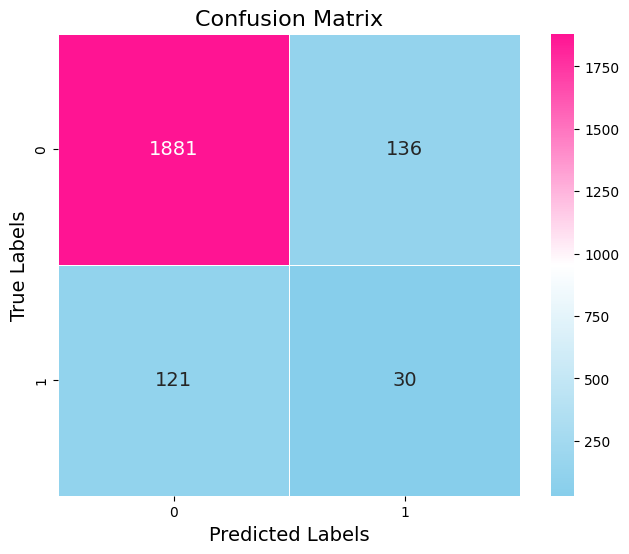

In [43]:
from matplotlib.colors import LinearSegmentedColormap

# 예측과 정답을 기반으로 Confusion Matrix 계산
conf_matrix = confusion_matrix(y_val, y_val_pred)

# 사용자 정의 그라데이션 컬러맵 생성
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['skyblue', 'white', '#FF1493'], N=256)

# Matplotlib을 사용하여 Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, cbar=True, 
            annot_kws={"size": 14}, linewidths=.5, square=True)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

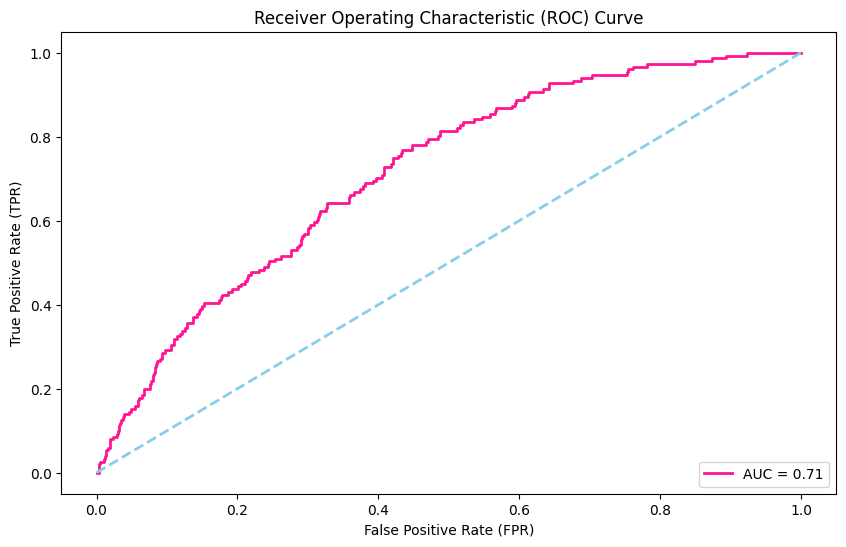

In [44]:

# 예측 확률 얻기
y_val_pred = model.predict_proba(X_val)[:, 1]

# FPR, TPR 계산
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)

# AUC 계산
roc_auc = auc(fpr, tpr)

# AUROC 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='#FF1493', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='skyblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [45]:
incorrect_indices = np.where(y_val_pred != y_val)[0]
print(incorrect_indices.sum())

2349028


In [46]:
# 모델로 예측 수행
y_test_pred = model.predict(X_test)

In [47]:
cross_entropy = log_loss(y_test, y_test_pred, labels=[0, 1])
print(f'Cross-Entropy: {cross_entropy}')

Cross-Entropy: 4.389079563988435


In [48]:


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# True Positive, False Positive, False Negative, True Negative
tp, fp, fn, tn = conf_matrix.ravel()

# Sensitivity (Recall)
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

# Precision
precision = precision_score(y_test, y_test_pred)
print(f"Precision: {precision}")

# F1 Score
f1 = f1_score(y_test, y_test_pred)
print(f"F1 Score: {f1}")

# AUROC
y_test_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)
print(f"AUROC: {roc_auc}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

Confusion Matrix:
[[1880  138]
 [ 126   24]]
Sensitivity (Recall): 0.9371884346959123
Specificity: 0.14814814814814814
Precision: 0.14814814814814814
F1 Score: 0.15384615384615383


AUROC: 0.6406508093822266
Precision-Recall AUC: 0.10777043097694841


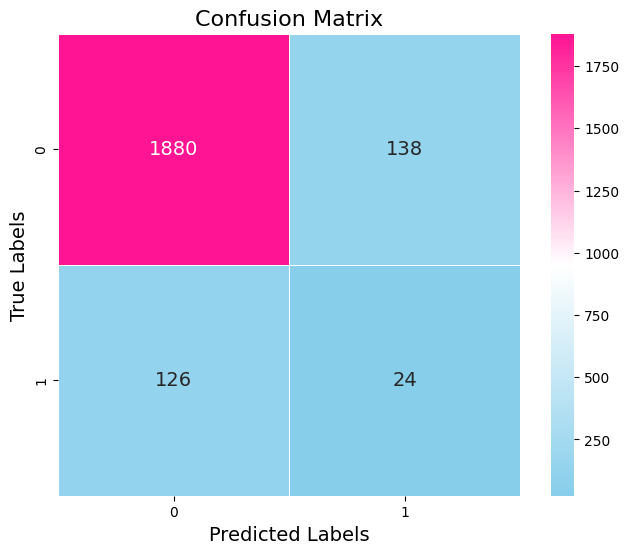

In [49]:
from matplotlib.colors import LinearSegmentedColormap

# 예측과 정답을 기반으로 Confusion Matrix 계산
conf_matrix = confusion_matrix(y_test, y_test_pred)

# 사용자 정의 그라데이션 컬러맵 생성
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['skyblue', 'white', '#FF1493'], N=256)

# Matplotlib을 사용하여 Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, cbar=True, 
            annot_kws={"size": 14}, linewidths=.5, square=True)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

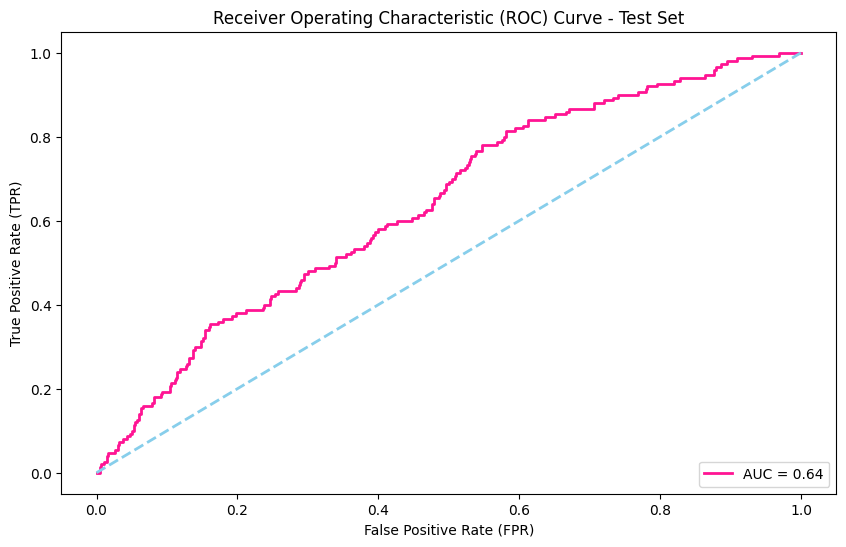

In [50]:
# 예측 확률 얻기
y_test_pred = model.predict_proba(X_test)[:, 1]

# FPR, TPR 계산
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)

# AUC 계산
roc_auc_test = auc(fpr_test, tpr_test)

# AUROC 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(fpr_test, tpr_test, color='#FF1493', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='skyblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc='lower right')
plt.show()

In [51]:
# 모델로 예측 수행
y_sph_pred = model.predict(X_sph_test)

In [52]:
cross_entropy = log_loss(y_sph_test, y_sph_pred, labels=[0, 1])
print(f'Cross-Entropy: {cross_entropy}')

Cross-Entropy: 3.436525276564255


In [53]:


# Confusion Matrix
conf_matrix = confusion_matrix(y_sph_test, y_sph_pred)
print("Confusion Matrix:")
print(conf_matrix)

# True Positive, False Positive, False Negative, True Negative
tp, fp, fn, tn = conf_matrix.ravel()

# Sensitivity (Recall)
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity}")

# Specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity}")

# Precision
precision = precision_score(y_sph_test, y_sph_pred)
print(f"Precision: {precision}")

# F1 Score
f1 = f1_score(y_sph_test, y_sph_pred)
print(f"F1 Score: {f1}")

# AUROC
y_sph_prob = model.predict_proba(X_sph_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_sph_test, y_sph_prob)
roc_auc = auc(fpr, tpr)
print(f"AUROC: {roc_auc}")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_sph_test, y_sph_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

Confusion Matrix:
[[23199  1896]
 [  561   114]]
Sensitivity (Recall): 0.9763888888888889
Specificity: 0.056716417910447764
Precision: 0.056716417910447764
F1 Score: 0.08491620111731843


AUROC: 0.7016795141425545
Precision-Recall AUC: 0.04986301374204977


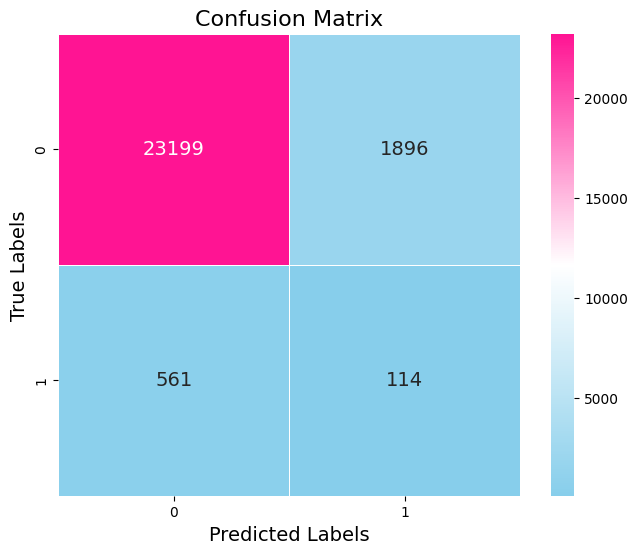

In [54]:
# 예측과 정답을 기반으로 Confusion Matrix 계산
conf_matrix = confusion_matrix(y_sph_test, y_sph_pred)

# 사용자 정의 그라데이션 컬러맵 생성
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['skyblue', 'white', '#FF1493'], N=256)

# Matplotlib을 사용하여 Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=cmap, cbar=True, 
            annot_kws={"size": 14}, linewidths=.5, square=True)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

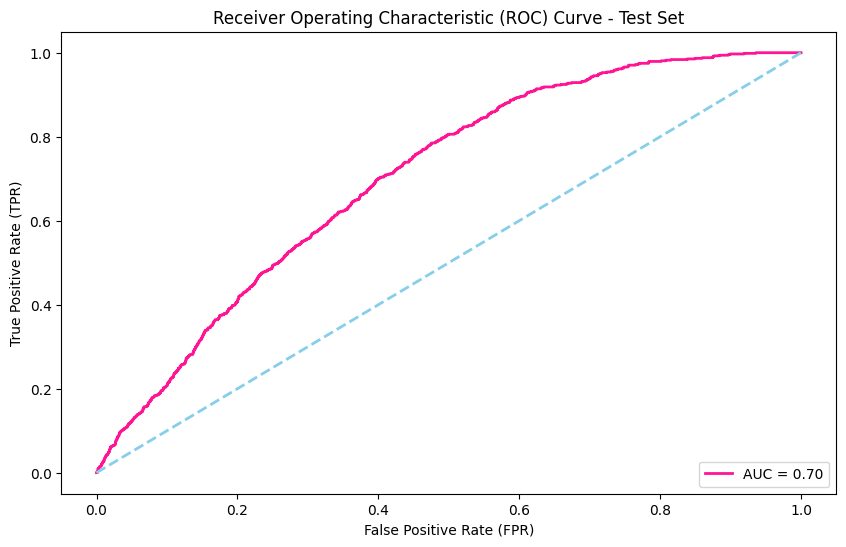

In [55]:
# 예측 확률 얻기
y_test_pred = model.predict_proba(X_sph_test)[:, 1]

# FPR, TPR 계산
fpr_test, tpr_test, thresholds_test = roc_curve(y_sph_test, y_test_pred)

# AUC 계산
roc_auc_test = auc(fpr_test, tpr_test)

# AUROC 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(fpr_test, tpr_test, color='#FF1493', lw=2, label=f'AUC = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], color='skyblue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc='lower right')
plt.show()